# Linguistic Pattern Analysis on Religion-based Subreddits

## Background

Many people relies on reddit.com as their source of information when in doubt. Reddit gains its popularity due to the constant support of its fanbase who actively exchanging information and opinion about certain matters which continually increase the wealth of resources that it accumulates. Specifically, reddit.com provides a subchannel for its communities to discuss matter pertaining to specific topic on a platform called subreddit. Subreddit covers a variety of topics ranging from politics, science, entertainment, music, books, sports and many more. These subreddits, which are maintained by reddit administrators who spent considerable amount of resources ensuring no harrassment related posts ([source](https://en.wikipedia.org/wiki/Reddit)), attracts like-minded people and slowly develop to have distinct cultures from one another. 

This organically evolving culture, despite being mostly good as it promotes safe environment for the fanbase to express themselves, sometimes can feel foreign and may be daunting for new people who wants to seek information on the platform. Therefore, this project aims to understand the cultural aspect and semantic of differing subreddits through the lens of Natural Language Processing (NLP). The two subreddits of choice for the analysis are https://www.reddit.com/r/Buddhism/ and https://www.reddit.com/r/Christianity/ as the subreddits are two different yet somewhat similar topic about religion.

## Problem Statement

Buddhism and Christianity subreddits have been around since March 2008 and January 2008, accordingly. Over the pass 12 years, they have grown into an ecosystem where many people interested about the religion discuss about matters pertaining to life from the lense of each religion. Despite these similarities, the two subreddits have their uniqueness about what information being exchanged and the means that information is exchanged. Therefore, this project aims to obtain insight on the underlying linguistic and cultural pattern between the Christianity and Buddhism subreddits.

## Proposed Approach

To analyse the underlying cultural context of these two subreddits, the project is divided into two folds. 
1. Data Gathering and Selection:<br>
    - Scrape post title, post text and comments from each subreddits.
    - Find which combination of data is able to provide the most distinctive difference between the subreddits.


2. Analyse the post for any cultural difference **using exploratory data analysis and NLP**:
    - NLP through Count Vectorizer and Tf-idf Vectorizer is introduced to **analyse the frequency of word usage for both subreddits**.
    - The **strength of the difference** can be predicted by **how well the NLP model classify a series of posts** from the subreddits to their respective origin. If the NLP model is able to capture high accuracy in this classification activity, we can conclude that there is indeed a difference in subreddit word usage. 
    
The vectorization method described above only covers the means to separate a string of text into its composition words. Subsequently, machine learning classifiers are deployed and compared against each other to obtain the most suitable classifier for this context. **The most useful classifier would be one with high explainability, thus provides insight on different words used in each subreddit, but also have reasonable accuracy as a guarantee that the validity of our deduction.**

## Executive Summary

Subreddit within reddit.com provides a safe environment for like-minded people to exchange information on a specific topic. Given some time, these subreddits develops their own unspoken set of culture and linguistic uniqueness. This unique 'accent' may feel foreign to a subredditer with little familiarity to the subreddit and may be daunting for him/ her to post a question. 

Therefore, a similar yet contrasting subreddits are chosen to observe the possibility to identify distinct features on them based on **Exploratory Data Analysis and Natural Language Processing**. The two subreddits of choice are **Christianity and Buddhism** subreddits. They share similarities in terms of they are both religion-based subreddit but from a different religion doctrine. The result are promising as the analysis managed to uncover unique linguistic pattern and subtle cultural difference between the two subreddits. 

## List of Content

- [1. Natural Language Processing Analysison Religion-based Subreddit](#Natural-Language-Processing-Analysison-Religion-based-Subreddit)
    - [1.1 Background](#Background)
    - [1.2 Problem Statement](#Problem-Statement)
    - [1.3 Proposed Approach](#Proposed-Approach)
    - [1.4 Executive Summary](#Executive-Summary)
    - [1.5 List of Content](#List-of-Content)
    - [1.6 Import Libraries](#Import-Libraries)
- [2. Data Gathering](#Data-Gathering)
    - [2.1 Obtain Posts from Subreddit](#Obtain-Posts-from-Subreddit)
    - [2.2 Obtain Next Post After First Request](#Obtain-Next-Post-After-First-Request)
    - [2.3 Obtain Comments from Post](#Obtain-Comments-from-Post)
    - [2.4 Generate Function to automate Web-scrapping](#Generate-Function-to-automate-Web-scrapping)
- [3. Exploratory Data Analysis](#Exploratory-Data-Analysis)
    - [3.1 Empty Posts](#Empty-Posts)
    - [3.2 Word Counts](#Word-Counts)
    - [3.3 Sentiment Analysis](#Sentiment-Analysis)
- [4. Dataset and NLP Model Selection](#Dataset-and-NLP-Model-Selection)
    - [4.1 Dataset Selection](#Dataset-Selection)
    - [4.2 Model Selection](#Model-Selection)
- [5. Final Model](#Final-Model)
    - [5.1 AUC-ROC Curve](#AUC-ROC-Curve)
    - [5.2 Identification of Jargons](#Identification-of-Jargons)
    - [5.3 Misclassified Posts](#Misclassified-Posts)
- [6. Summary](#Summary)
    - [6.1 Conclusion](#Conclusion)
    - [6.2 Model Limitation and Recommendation](#Model-Limitation-and-Recommendation)

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup as BS
import random
import string
import time
import nltk
import math
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction import text 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier 
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, plot_confusion_matrix, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.sentiment import SentimentIntensityAnalyzer
from PIL import Image
from wordcloud import WordCloud

pd.set_option('display.max_columns', None)

# Data Gathering

**Note to reviewer**
- If you wish to rerun the notebook, you may want to skip [Section 2](#Data-Gathering) as it will extract the data on the new subreddit posts. Or else, you may choose to skip step [2.4.1](#Save-file-to-csv) to prevent rewriting the original csv data used in the subsequent analysis.

## Obtain Posts from Subreddit

In [2]:
# Create url for reddit request
subreddit_url = 'https://www.reddit.com/r/Christianity'
page_url = subreddit_url + '.json'

# Send get request on the subreddit to obtain its page content
page_req = requests.get(page_url, headers={'User-agent':'Jefferson is accessing'})

# Print status code to ensure no issue
page_req.status_code 

200

In [3]:
# Obtain json content from the request
page_jsn = page_req.json()

# Observe usable content of the page
post_no = 1  # to select which post to view
page_jsn['data']['children'][post_no]['data']

{'approved_at_utc': None,
 'subreddit': 'Christianity',
 'selftext': "I see this happening more and more. Here's the thing. I love ALL people, as Jesus intended. I don't judge. I am in no place to condemn anyone. I am just as much of a sinner. However, homosexuality is a sin! It is equal to many other sins. The bible does say so. We can't claim that it doesn't say it! We have to accept the truth and share it with our brothers and sisters and pray that they can chnage their ways. Our churches are failing us. They have strayed so far from the truth. We must always love one another, but we as Christians cannot accept sin and say it is okay. We have to wake up friends! \n\nLeviticus 18:22, 20:13\nRomans 1:26-27\nCorinthians 6:9-10\nTimothy 1:9-10",
 'author_fullname': 't2_2bctmthb',
 'saved': False,
 'mod_reason_title': None,
 'gilded': 0,
 'clicked': False,
 'title': 'The churches that tell us that homosexuality is not a sin are failing us.',
 'link_flair_richtext': [],
 'subreddit_name_p

In [4]:
# More of useful contents from the page

## Post content
print("Post content:")
print(page_jsn['data']['children'][post_no]['data']['selftext'])

## Post link (to extract comments on the post later on)
print("\nPost link:")
post_id = page_jsn['data']['children'][post_no]['data']['name'].replace('t3_','')
print(post_id)

## Link for subsequent 25 posts
print("\nAfter link:")
after = page_jsn['data']['after']
print(after)

Post content:
I see this happening more and more. Here's the thing. I love ALL people, as Jesus intended. I don't judge. I am in no place to condemn anyone. I am just as much of a sinner. However, homosexuality is a sin! It is equal to many other sins. The bible does say so. We can't claim that it doesn't say it! We have to accept the truth and share it with our brothers and sisters and pray that they can chnage their ways. Our churches are failing us. They have strayed so far from the truth. We must always love one another, but we as Christians cannot accept sin and say it is okay. We have to wake up friends! 

Leviticus 18:22, 20:13
Romans 1:26-27
Corinthians 6:9-10
Timothy 1:9-10

Post link:
mabn13

After link:
t3_mafh0g


## Obtain Next Post After First Request

In [5]:
# Create url for reddit request
after_page_url = subreddit_url + '.json?after=' + after

# Send get request on the subreddit to obtain its page content
after_page_req = requests.get(after_page_url, headers={'User-agent':'Jefferson is accessing'})

# Print status code to ensure no issue
after_page_req.status_code 

200

## Obtain Comments from Post

In [6]:
# Create url for reddit post
post_url = subreddit_url + '/comments/' + post_id + '.json'

# Send get request on the subreddit to obtain its post
post_req = requests.get(post_url, headers={'User-agent':'Jefferson is accessing'})

# Print status code to ensure no issue
post_req.status_code

200

In [7]:
# Obtain json content from the request
post_jsn = post_req.json()

# Observe usable content of the post
## 1st number (1) is to obtain the comment on the post --> number (0) is to obtain the original post
## 2nd number (0) is to obtain which comment on the post
post_jsn[1]['data']['children'][0]['data'].keys() 

dict_keys(['total_awards_received', 'approved_at_utc', 'comment_type', 'awarders', 'mod_reason_by', 'banned_by', 'ups', 'author_flair_type', 'removal_reason', 'link_id', 'author_flair_template_id', 'likes', 'replies', 'user_reports', 'saved', 'id', 'banned_at_utc', 'mod_reason_title', 'gilded', 'archived', 'no_follow', 'author', 'can_mod_post', 'send_replies', 'parent_id', 'score', 'author_fullname', 'report_reasons', 'approved_by', 'all_awardings', 'subreddit_id', 'body', 'edited', 'downs', 'author_flair_css_class', 'is_submitter', 'collapsed', 'author_flair_richtext', 'author_patreon_flair', 'body_html', 'gildings', 'collapsed_reason', 'associated_award', 'stickied', 'author_premium', 'subreddit_type', 'can_gild', 'top_awarded_type', 'author_flair_text_color', 'score_hidden', 'permalink', 'num_reports', 'locked', 'name', 'created', 'subreddit', 'author_flair_text', 'treatment_tags', 'created_utc', 'subreddit_name_prefixed', 'controversiality', 'depth', 'author_flair_background_color'

In [8]:
# More of useful contents from the post

## Comment content
print("Comment content:")

## To print content of the first comment on the post
print("- Content 1:")
print(post_jsn[1]['data']['children'][0]['data']['body'])

Comment content:
- Content 1:
Gonna get a lot of cynicism and sarcastic responses, of course! I can tell you're being genuine. I don't think you're full of hate. I think people who equate opposing beliefs to hatred are pretty ignorant, to be honest. That's how children think. "They didn't approve of what I said or did, they must hate me!" Not always the case. Maybe they just don't agree with what you did and it has no reflection on what they think of you as a person. 🤷‍♂️

My main issue is this:
&gt; However, homosexuality is a sin! It is equal to many other sins.

The church doesn't treat it like it's equal to many other sins. The church is known around the world to pick on gay people more than anybody else. I don't remember the last time I've ever seen a college campus  protest against adultery. Or lying. Or running red lights.

It's always about LGBT people or abortions.

So think of that from their perspective. All you see is Christians hammering on this one issue ALL THE TIME, but

## Generate Function to Automate Web-scrapping

To allow easy in code modification later on, a few functions will be developed to automate overall process. Functions to be built:
- **Post generator**: post_generator
    - Function: to scrape subreddit pages and return the pages content. This function will be called by **Dataframe generator**
    - Input:
        - Number of page request (1 request = 25 posts): request_count
        - Subreddit url: subreddit_url                
- **Comment generator**: comment_generator
    - Function: to scrape a subreddit post and return the post comments. This function will be called by **Post generator**
    - Input:
        - Post ID to be scrape: post_id
        - Subreddit url: subreddit_url
        - Number of maximum comments to scrape on each post: comment_count
- **Dataframe generator**: dataframe_generator
    - Function: to generate a dataframe from **Post generator** output
    - Input: 
        - Subreddit url: subreddit_url
        - Number of page request (1 request = 25 posts): request_count
        - Number of maximum comments to scrape on each post: comment_count
- **Random user agent generator**: user_agent_generator
    - Function: to generate a random string for user agent on get requests invocation to avoid the requirement to sleep the process. This function will be called by **Post generator** and **Comment generator**.
    - Input:
        - Length of user agent digit: length
        
As the functions above are intercorrelated, we will run the function in a specific order to prevent calling function before it was defined. Order as follows:
1. user_agent_generator
2. comment_generator
3. post_generator
4. dataframe_generator.

In [9]:
# This user agent generator is implemented to avoid the need of random sleep time

def user_agent_generator(length):
    return ''.join(random.choice(string.ascii_uppercase + string.digits) for _ in range(length))

In [10]:
# This comment generator returns the comment with the highest upvote if there are more comments than comment_count

def comment_generator(headers, post_id, subreddit_url, comment_count):
    comment_dict = dict()                  # Generate a dictionary holder for first level comment on the post

    post_url = subreddit_url + '/comments/' + post_id + '.json'  # url of the post
    post_req = requests.get(post_url, headers=headers) # get request result of the post
    
    # Check if the get request is successful
    if post_req.status_code == 200:
        post_jsn = post_req.json()         # Obtain json format of the content
    else:
        print("Error in requesting comment. Current post url: {}".format(post_url)) # Otherwise print url to debug

    comments = post_jsn[1]['data']['children']   # Create comments list to be iterated
    for i in range(comment_count):
        key = 'comment_' + str(i+1)              # Set key to rename the dictionary keys to comment_1 to comment_5
        try:
            comment_dict[key] = comments[i]['data']['body']   # Set the dictionary value based on comment
        except:
            comment_dict[key] = ''               # Set empty string if post has less than comment_count comment

    return comment_dict                          # Return a dictionary containing comments

In [11]:
def post_generator(request_count, subreddit_url, comment_count=5):
    post_lst = []         # Create an empty list of posts which will be filled with dictionary of posts
    after = '.json'       # To extract json content of the page
    
    for loop in range(request_count): # Send request N times to obtain N x 25 posts
        headers = {'User-agent': user_agent_generator(10)} # To generate randomized user agent to avoid sleep function
        
        subreddit_url_after = subreddit_url + after  # url of new page for the current loop
        page_req = requests.get(subreddit_url_after, headers=headers)   # get request of the page
        
        if page_req.status_code == 200:      # check if page request is successful
            page_jsn = page_req.json()       # convert it to json file
        else:
            # Print url if error is encountered
            print("Error in requesting page. Current page url: {}".format(page_url_after))
            
        # Update after value to scrap the next 25 posts
        after = '.json?after=' + page_jsn['data']['after']
        
        # Collect all posts in the page
        for post in page_jsn['data']['children']:
            post_data = post['data'].keys()        # Generate keys for the dictionary
            post_dict = dict()                     # Generate a dictionary holder for each post
            
            # Populate the content of the dictionary using the post content
            for column in post_data:
                try:
                    post_dict[column] = post['data'][column]
                except:
                    post_dict[column] = np.NaN
            
            post_id = post['data']['name'].replace('t3_','') # to form comment url
            
            comment_dict = comment_generator(headers, post_id, subreddit_url, comment_count)
            post_dict.update(comment_dict)
            post_lst.append(post_dict)
    
    return post_lst

def RequestError():
    pass

In [12]:
def dataframe_generator(subreddit_url, request_count, comment_count): 
    start_time = time.time()   # Starting time when function is invoked
    posts = pd.DataFrame(post_generator(request_count, subreddit_url, comment_count))  # create dataframe from post generator output
    religion = subreddit_url.rsplit('/', 1)[1]    # obtain subreddit page name
    posts.rename_axis('index', inplace=True)      # set index axis as index
    posts.drop(labels=0, inplace=True)            # drop first index
    
    # print processing time
    print("Total Runtime to scrape '{}' subreddit pages {} times: ".format(religion, request_count))
    print("--- %s seconds ---" % (time.time() - start_time)) # processing time = current time - start time
    
    return posts

In [ ]:
# Generate dataframe from subreddit posts and comments 
cdf = dataframe_generator('https://www.reddit.com/r/Christianity', request_count=25, comment_count=3)
bdf = dataframe_generator('https://www.reddit.com/r/Buddhism', request_count=25, comment_count=3)

### Save file to csv

Uncomment this line block to replace the original file.

In [13]:
# # Save extracted file to csv
# # This step is crucial as we dont need to repetitively scrape the web as it takes a lot of time
# cdf.to_csv('./extracted_data_set/christianity.csv', na_rep='')
# bdf.to_csv('./extracted_data_set/buddhism.csv', na_rep='')

# Exploratory Data Analysis

In [14]:
# Import csv file
cdf = pd.read_csv('./extracted_data_set/christianity.csv')
bdf = pd.read_csv('./extracted_data_set/buddhism.csv')

## Empty Posts

Selftext refers to the content of the post itself. Let us check the presence of post without any selftext.

In [15]:
# Print number of unique and non-empty self-text on each subreddit pages
print("Unique and non-empty self-text on Christian subreddit: {}".format(cdf[['selftext']].nunique()[0]))
print("Unique and non-empty self-text on Buddhist subreddit: {}".format(bdf[['selftext']].nunique()[0]))

Unique and non-empty self-text on Christian subreddit: 469
Unique and non-empty self-text on Buddhist subreddit: 419


There are two types of posts with no selftext content. There are those posts with long title (the title becomes the post itself) or post containing picture(s). Therefore, we can still obtain some information from the title or comments accordingly. We can observe media-type post by extracting 'is_self' value of the post, i.e. 'False' means post with picture and 'True' is post without. 

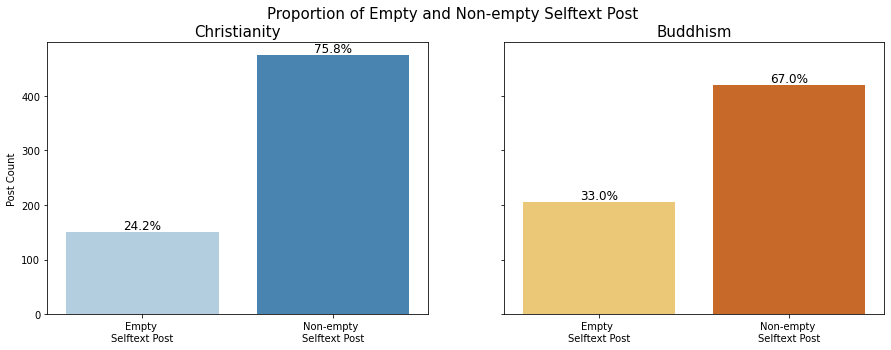

In [16]:
# Plot a barplot showing empty selftext vs non-empty selftext posts for each subreddit
fig, ax = plt.subplots(ncols=2, figsize=(15,5), sharey=True)
ax=ax.ravel()

# Define a function to show the percentage figure
def percent_plot(df, ax):
    ax.text(0, df['selftext'].isnull().sum(),
            str(round(df['selftext'].isnull().sum()/len(df)*100,1)) + '%',
            ha='center', va='bottom', fontsize=12)
    ax.text(1, (len(df) - df['selftext'].isnull().sum()),
            str(round((len(df) - df['selftext'].isnull().sum())/len(df)*100,1)) + '%',
            ha='center', va='bottom', fontsize=12)

# Common title for the subplot
plt.suptitle('Proportion of Empty and Non-empty Selftext Post', fontsize=15)
    
# Subplot for Christian subreddit
sns.countplot(x=cdf['selftext'].isnull(), order=[True, False], palette='Blues', ax=ax[0])
ax[0].set_xticklabels(['Empty \nSelftext Post', 'Non-empty \nSelftext Post'])
ax[0].set_title('Christianity', fontsize=15)
ax[0].set_xlabel('')
ax[0].set_ylabel('Post Count')
percent_plot(cdf, ax[0])

# Subplot for Buddhism subreddit
sns.countplot(x=bdf['selftext'].isnull(), order=[True, False], palette='YlOrBr', ax=ax[1])
ax[1].set_xticklabels(['Empty \nSelftext Post', 'Non-empty \nSelftext Post'])
ax[1].set_title('Buddhism', fontsize=15)
ax[1].set_xlabel('')
ax[1].set_ylabel('')
percent_plot(bdf, ax[1]);

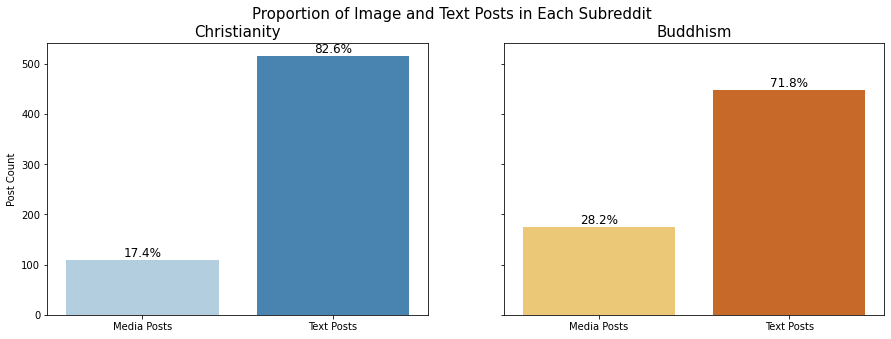

In [17]:
# Plot a barplot showing Media (image and video) post vs Text posts for each subreddit
fig, ax = plt.subplots(ncols=2, figsize=(15,5), sharey=True)
ax=ax.ravel()

# Define a function to show the percentage figure
def percent_plot(df, ax):
    ax.text(0, df[df['is_self'] == False]['is_self'].count(),
            str(round(df[df['is_self'] == False]['is_self'].count()/len(df)*100,1)) + '%',
            ha='center', va='bottom', fontsize=12)
    ax.text(1, df[df['is_self'] == True]['is_self'].count(),
            str(round(df[df['is_self'] == True]['is_self'].count()/len(df)*100,1)) + '%',
            ha='center', va='bottom', fontsize=12)

# Common title for the subplot
plt.suptitle('Proportion of Image and Text Posts in Each Subreddit', fontsize=15)

# Subplot for Christian subreddit
sns.countplot(data=cdf, x='is_self', palette='Blues', ax=ax[0])
ax[0].set_xticklabels(['Media Posts', 'Text Posts'])
ax[0].set_title('Christianity', fontsize=15)
ax[0].set_xlabel('')
ax[0].set_ylabel('Post Count')
percent_plot(cdf, ax[0])

# Subplot for Buddhism subreddit
sns.countplot(data=bdf, x='is_self', palette='YlOrBr', ax=ax[1])
ax[1].set_xticklabels(['Media Posts', 'Text Posts'])
ax[1].set_title('Buddhism', fontsize=15)
ax[1].set_xlabel('')
ax[1].set_ylabel('')
percent_plot(bdf, ax[1]);

Posts on both subreddits show inclination to include some text on the post (67% for Buddhism and 75.8% for Christianity). However, people on Buddhism subreddit shares more posts without any text than of Christianity subreddit as people posting in Buddhism subreddit post tends to share image or video posts which does not require any text to convey the message.

Let's check amongst the empty post, whether or not the title and comments are also empty. If yes, we need to remove the post as there is no way for us to do prediction without any obtainable text. 

In [18]:
# Define a function to extract columns associated with comments on the post
def comment_cols(df):
    return [key for key in df.keys() if 'comment_' in key]

comment_columns = comment_cols(cdf)

In [19]:
# Create a function to convert nan values to an empty string

def convert_nan(df, columns):
    for column in columns:
        df[column] = df[column].apply(lambda x: '' if pd.isnull(x) else x)

columns = ['title', 'selftext'] + comment_cols(cdf)
convert_nan(cdf, columns)
convert_nan(bdf, columns)

In [20]:
# Print the number of empty text with no title and comments

def empty_printer(df, columns):
    for column in columns:
        print("The number of empty selftext post with no {} entry: {}".format(
            column, df[df['selftext'].isnull()][column].isnull().sum()
        ))
        
columns = ['title'] + comment_cols(cdf)
# For Christianity subreddit
print('For Christianity subreddit:')
empty_printer(cdf, columns)
print('\nFor Buddhism subreddit:')
# For Buddhism subreddit
empty_printer(bdf, columns)

For Christianity subreddit:
The number of empty selftext post with no title entry: 0
The number of empty selftext post with no comment_1 entry: 0
The number of empty selftext post with no comment_2 entry: 0
The number of empty selftext post with no comment_3 entry: 0

For Buddhism subreddit:
The number of empty selftext post with no title entry: 0
The number of empty selftext post with no comment_1 entry: 0
The number of empty selftext post with no comment_2 entry: 0
The number of empty selftext post with no comment_3 entry: 0


All posts from Buddhism and Christianity subreddits have some form of text information from their title and comments. Therefore, we will not remove any of the post with no selftext for now.

Subsequently, we will check for any deleted or removed post, comment or title. This is crucial as having more deleted or removed post in one subreddit may skew the model wrongly when it encounters the keyword 'deleted' or 'removed'. 

In [21]:
# Define a function to count number of post with [deleted] or [removed] title, selftext or comment
def deleted_removed_counter(df, columns):
    for column in columns:
        deleted_count = len(df[df[column].str.contains('\\[deleted\]')].index)
        removed_count = len(df[df[column].str.contains('\\[removed\]')].index)
        print("The number of entries on column {} containing the keyword '[deleted]' is: {}".format(column, deleted_count))
        print("The number of entries on column {} containing the keyword '[removed]' is: {}".format(column, removed_count))        

In [22]:
columns = ['title', 'selftext'] + comment_columns 

print("For Christianity subreddit: ")
deleted_removed_counter(cdf, columns)
print()
print("For Buddhism subreddit: ")
deleted_removed_counter(bdf, columns)

For Christianity subreddit: 
The number of entries on column title containing the keyword '[deleted]' is: 0
The number of entries on column title containing the keyword '[removed]' is: 0
The number of entries on column selftext containing the keyword '[deleted]' is: 0
The number of entries on column selftext containing the keyword '[removed]' is: 0
The number of entries on column comment_1 containing the keyword '[deleted]' is: 7
The number of entries on column comment_1 containing the keyword '[removed]' is: 1
The number of entries on column comment_2 containing the keyword '[deleted]' is: 2
The number of entries on column comment_2 containing the keyword '[removed]' is: 3
The number of entries on column comment_3 containing the keyword '[deleted]' is: 3
The number of entries on column comment_3 containing the keyword '[removed]' is: 4

For Buddhism subreddit: 
The number of entries on column title containing the keyword '[deleted]' is: 0
The number of entries on column title containi

Although the number is not high, we will still remove the corresponding entries for the reason mentioned earlier.

In [23]:
# define a function to remove the string [deleted] or [removed] from the title, selftext and comments
def deleted_removed_removal(df, comment_columns):
    columns = ['title', 'selftext'] + comment_columns
    for column in columns:
        df[column].str.replace('\\[deleted\]', '')
        df[column].str.replace('\\[removed\]', '')

## Invoke the function
deleted_removed_removal(cdf, comment_columns);
deleted_removed_removal(bdf, comment_columns);

<ipython-input-23-7fe73573de21>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df[column].str.replace('\\[deleted\]', '')
<ipython-input-23-7fe73573de21>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df[column].str.replace('\\[removed\]', '')


After performing the cleaning, let's see what are the most often used words for each subreddits to see any observable pattern.

## Word Counts

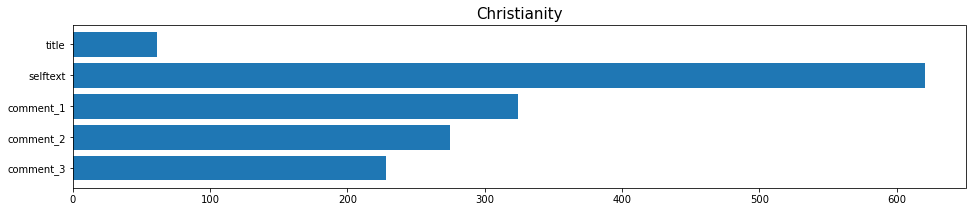

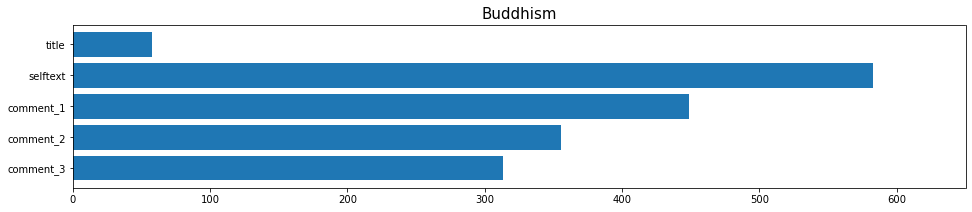

In [24]:
# Define a function to count the number of words used for the subreddits on each subsection
def total_word_count(df, title, columns):
    # Create a list containing an average number of words on each section
    lst = [df[column].str.len().mean() for column in columns]
    
    # Plot the barchart
    fig, ax = plt.subplots(figsize=(16, 3))
    ax.barh(columns, width=[df[column].str.len().mean() for column in columns])
    ax.set_title(title, fontsize=15)
    ax.set_xlim([0, 650]);

## Invoke the function
columns = comment_columns[::-1] + ['selftext', 'title']
total_word_count(cdf, 'Christianity', columns)
total_word_count(bdf, 'Buddhism', columns)

**Observations:**
- Post on Christianity subreddit contains slightly more word counts on the selftext section.
- However, people on Buddhism subreddits tends to share a longer comments on each post.

### Frequently Occuring Words

In [25]:
# Define a function to combine all comments for each post into a single entry
def combine_comments(df, comment_columns):
    df['all_comments'] = df.loc[:, comment_columns].apply(lambda x: ' '.join(x.astype(str)), axis=1)

## Invoke the function
combine_comments(cdf, comment_cols(cdf))
combine_comments(bdf, comment_cols(bdf))

In [26]:
# Define a function 'convert' to convert the string to individual preprocessed tokens

## Instantiate lemmatizer module
lemmatizer = WordNetLemmatizer()

## Define the custom function convert
def convert(string):
    lower = string.lower()                                    # convert the string to all lower case 
    tokens = list(filter(None, re.split('! | |\.|,',lower)))  # convert the string to individual tokens
    sw = set(stopwords.words('english'))                      # list of stopwords to remove
    no_nums = [token for token in tokens if (token.isalpha()) & (token not in sw)]  # remove numbers and stopwords
    return [lemmatizer.lemmatize(token) for token in no_nums]      # lemmatize the token and return the list

In [27]:
# Define a function to plot the number of token count on the subreddit for each sections
def word_count_plotter(df, columns):
    nrows = len(columns)
    fig, ax = plt.subplots(ncols=1, nrows=nrows, figsize=(16,5*nrows))
    ax = ax.ravel()

    for no, column in enumerate(columns):
        # Run Count Vectorizer to reduce the string into tokens and count them accordingly
        cvec = CountVectorizer(tokenizer=convert)
        cvec.fit(df[column])
        cvec_result = cvec.transform(df[column])
        
        # Define a dataframe of the token counts
        cvec_df = pd.DataFrame(cvec_result.todense().sum(axis=0),
                     columns=cvec.get_feature_names()).T.sort_values(by=0, ascending=False).head(20)
        cvec_df.sort_values(by=0, ascending=True, inplace=True)
        cvec_df.rename_axis('token',inplace=True)
        cvec_df.rename({0:'count'},axis=1, inplace=True)
        
        # Plot the tokens and their count, accordingly
        ax[no].barh(cvec_df.index, cvec_df['count'])
        ax[no].set_title('Word count from “' + column + '" entries')
        ax[no].set_ylabel('Word')

#### On Christianity subreddit

/Users/jeffersonqiu/opt/anaconda3/envs/dsi/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


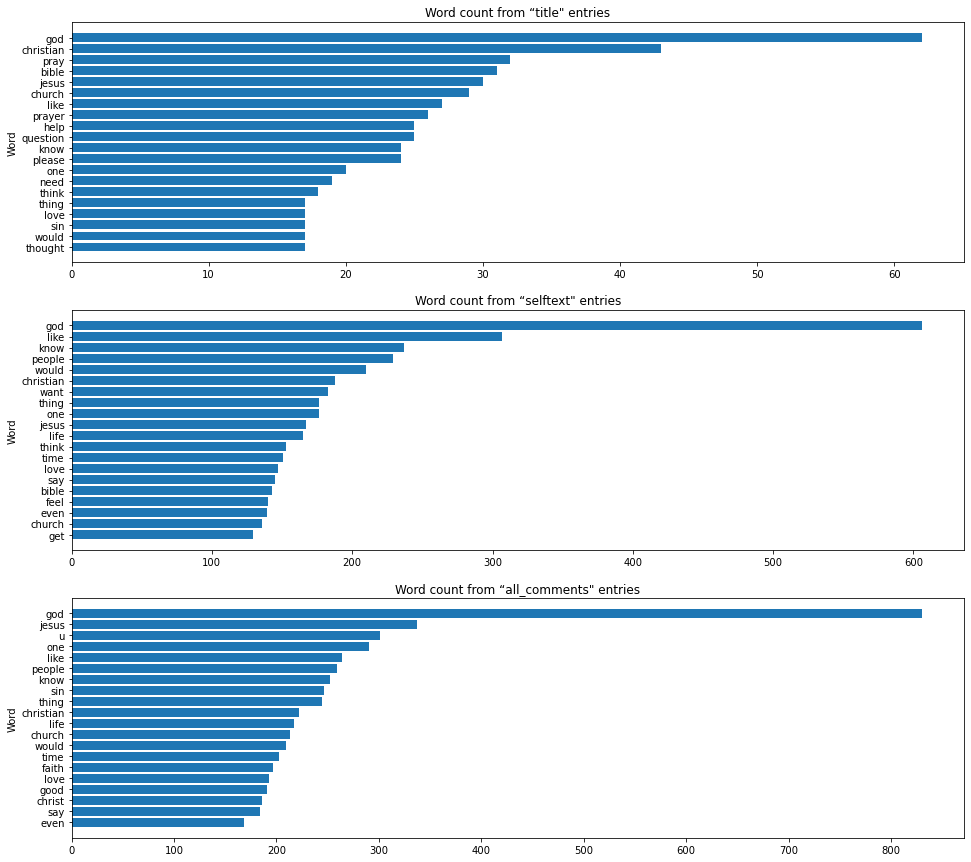

In [28]:
# For Christianity subreddit
columns = ['title', 'selftext', 'all_comments']
word_count_plotter(cdf, columns)

**Observation:**
- The word 'god' (lower-cased by the word preprocessor) is the main theme of words used in Christianity subreddit be on the title, selftext and comments. 
- The next used word are varied with some recurring words appearing in the top 20 of each entries such as **'jesus', 'christian', 'bible', 'sin', and 'church'**. 
- There are words that is usually associated with religion in general such as **life** also appears on the list. 
- However, there are some words not usually associated with Christianity that appears on the list such as **'like', 'thing', and 'one'**. This is likely to be a part of figure of speech during normal conversation. 

#### On Buddhism subreddit

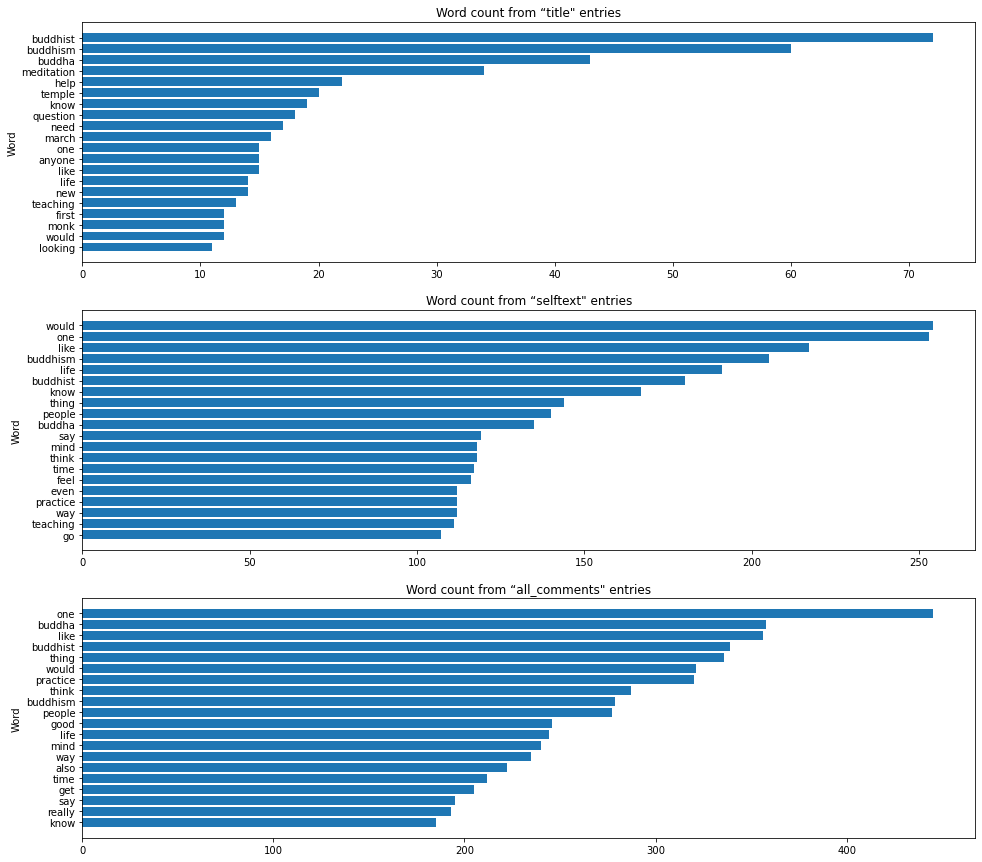

In [29]:
# For Buddhism subreddit
columns = ['title', 'selftext', 'all_comments']
word_count_plotter(bdf, columns)

**Observation:**

- Unlike Christianity subreddit, Buddhism subreddit does not a strong preference of the usage of words. The word 'Buddhist', 'Buddhism', 'Buddha' even only make a frequent appearance on the title columns but are not the most frequent words appeared in selftext and the comment sections. However, in general there are some common Buddhism related keywords appearing on the top 20 list such as **meditation and practice**. 
- Words such as **life, like, and one** also appears quite frequently in Buddhism subreeddit. As the first may closely correlated to the nature of religion to shine the light on the meaning of life, the two latter words are likely just a part of figure of speech.  
- There are also many articles from website url that makes it to the comment section such as **http, https, www**. Let us take a closer look into the frequency that people on each subreddit shares an external link.

In [30]:
# Define a function to capture a link by the count of string 'www' on the text
def url_counter(df, subreddit_name, columns):
    counter_dict = dict()
    for column in columns:
        count = df[column].str.count('www').mean()
        counter_dict[column] = count
        print("On average there are {} link(s) shared in {} subreddit on {} section.".format(count, subreddit_name, column))
    print()
    return counter_dict
    
## Invoke the function
columns = ['title', 'selftext', 'all_comments']

## Keep the values
total_url_count = dict()
total_url_count['Christianity'] = url_counter(cdf, 'Christianity', columns)
total_url_count['Buddhism'] = url_counter(bdf, 'Buddhism', columns)

On average there are 0.0 link(s) shared in Christianity subreddit on title section.
On average there are 0.0576 link(s) shared in Christianity subreddit on selftext section.
On average there are 0.1408 link(s) shared in Christianity subreddit on all_comments section.

On average there are 0.0 link(s) shared in Buddhism subreddit on title section.
On average there are 0.1584 link(s) shared in Buddhism subreddit on selftext section.
On average there are 0.5696 link(s) shared in Buddhism subreddit on all_comments section.



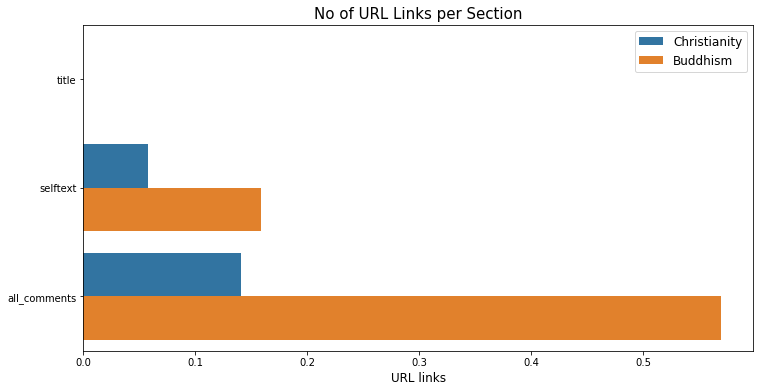

In [31]:
# Input it into a dataframe
url_df = pd.DataFrame(total_url_count)
url_df.reset_index(level=0, inplace=True)
url_df.rename(columns={'index': 'Sections'}, inplace=True)
url_df = url_df.melt(id_vars='Sections', var_name='Subreddit', value_name='Average URL links')

# Plot the score for different sections
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x=url_df["Average URL links"], y="Sections", hue="Subreddit", data=url_df, ax=ax)
ax.set_title('No of URL Links per Section', fontsize=15)
ax.set_xlabel('URL links', fontsize=12)
ax.set_ylabel('')
ax.legend(fontsize=12);

**Observation:**
- As expected, people only shares link on selftext and comment section.
- On average, people on Buddhism subreddit tends to share more link pointing to external resources than people in Christianity subreddit. On average the number is three times as much for Buddhism subreddit relative to Christianity subreddit.
- There are about three times as much links on comments section (from the first three most upvoted comments) as compared to count of links on the selftext section.

**Christianity and Buddhism**

As expected from both subreddits, it is uncommon to see the word 'Christianity' and 'Buddhism' on the list. These two words together with words belonging to the same root will be removed from the list for the sake of fairness in assessing the model. The word 'Jesus', 'sin', 'bible' and 'church' also will be removed as it is strongly correlated to Christianity subreddit.

Also, as there are multiple url articles on Buddhism subreddits which does not contributes to any semantic of the speech, they will also be removed. It is also noted that, word such as 'would' also make it quite high to the list for both religion. As it may not contribute to a significant change in meaning, it would also be removed.

In [75]:
## redefine the custom function convert_updated to account for the word Buddhism, Christianity and url articles

def convert_updated(string):
    lower = string.lower()                                    # convert the string to all lower case 
    tokens = list(filter(None, re.split('! | |\.|,',lower)))  # convert the string to individual tokens
    sw = set(stopwords.words('english'))                      # list of stopwords to remove
    sw.update(['buddhism', 'buddhist', 'buddha',
                'christian', 'christians', 'christianity', 'christ',
               'www', 'http', 'https', 'would'])     # update the stop words list
    no_nums = [token for token in tokens if (token.isalpha()) & (token not in sw)]  # remove numbers and stopwords
    return [lemmatizer.lemmatize(token) for token in no_nums]      # lemmatize the token and return the list

**Title, Selftext and Comment**

On this analysis, there are maximum 3 comments extracted from the original post. As some post has a high comment counts, we can always scrape more comments with the risk of having the actual post being eclipsed by words from the comment section. This way comment section contributes about the same amount of words as compared to the selftext.

Therefore, 3 comments will be used subsequently to still include information from the comment section but not eclipsing those text contained inthe selftext.

### Word Cloud

To better understand the usage of jargons for Buddhism and Christianity subreddits, we are going to visualize the frequency of the word usage using word cloud. Fortunately, python also comes with a library that will perform word cloud generator to do just that! 

In [33]:
# Combine the useful information (selftext, title and comments) into a single column

def combine_text(df):
    df['all_text'] = df['selftext'] + ' ' + df['title'] + ' ' + df['all_comments']   
    df['title_selftext'] = df['selftext'] + ' ' + df['title']
    df['selftext_comment'] = df['selftext'] + ' ' + df['all_comments'] 

## Invoke the function
combine_text(cdf)
combine_text(bdf) 

In [76]:
# Define a function to generate wordcloud with the mask according to the symbol of the religion
def wordcloud_plotter(text_array, mask_url, ):
    # Combine all the text from title, selftext and comments section into a long string
    text = ''
    for row in text_array:
        text += row
        
    # Define a mask in the shape of religion symbol
    mask = np.array(Image.open(mask_url))
    
    # Define a list of stopwords to exclude from the word cloud
    sw = set(stopwords.words('english'))
    sw.update(['buddhism', 'buddhist', 'buddha',
                'christian', 'christians', 'christianity', 'christ', 
               'www', 'http', 'https', 'would'])
    
    # Define the wordcloud
    wordcloud = WordCloud(width = 1000,
                          height = 2000,
                          random_state=1,
                          background_color='white',
                          colormap='Set2',
                          collocations=False,
                          mask=mask, stopwords=sw).generate(text)
    
    # Plot the word cloud
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off")  

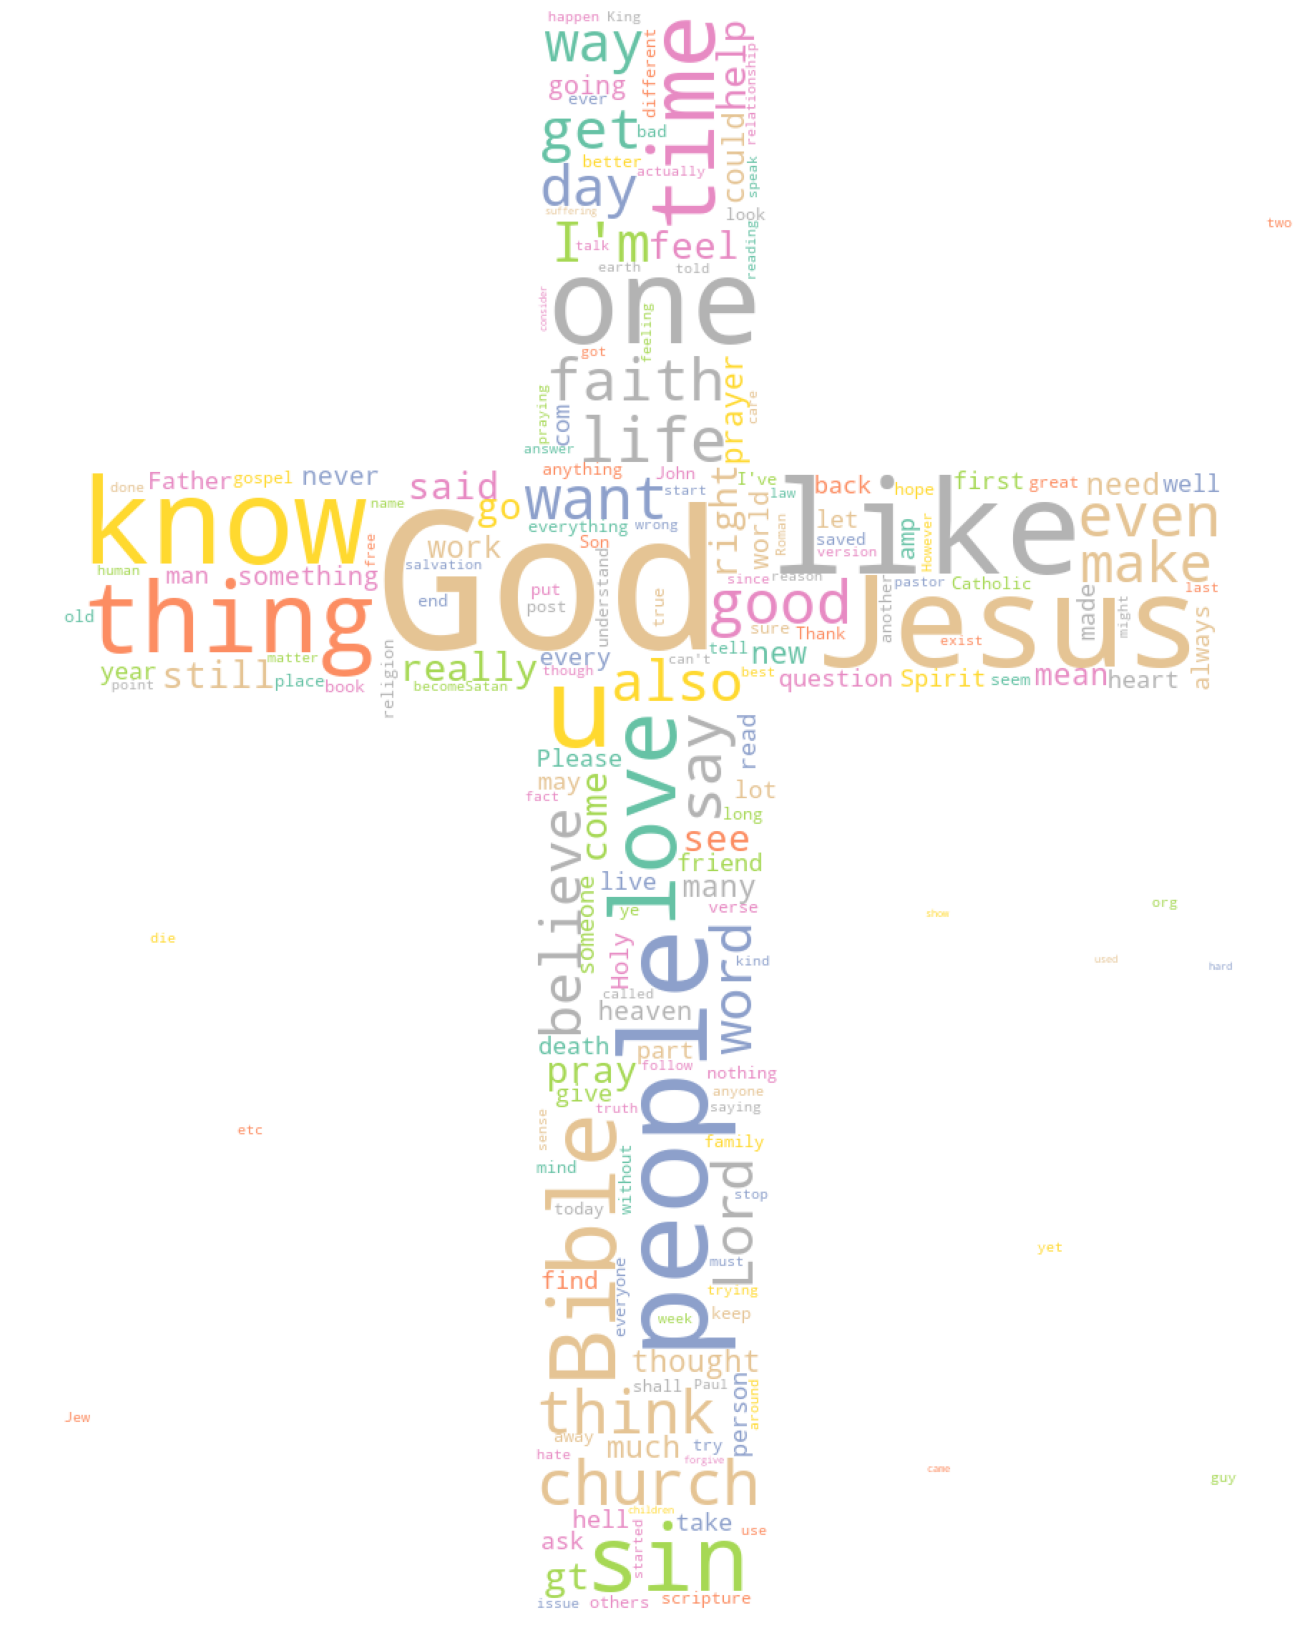

In [77]:
wordcloud_plotter(cdf['all_text'], './media/christian_logo.jpeg')

**Observation:**
- Similar to previous observation, the words 'God' and 'Jesus' are central of discussion in the Christianity subreddit. This is even much more than the mention of the word 'Christian' itself. 

Example:
1. HOW GREAT IS OUR **GOD**!!!! For covering all our sins in his love. For most of my life I didn’t have a close relationship with **God** until this year I felt a strong awakening in myself. At the time I was devastated by why I was so depressed and sad, but I realized this sudden conviction was a result of my absent relationship with **God**, and our innate desire for connection with him.
2. I want to be close with **God** but I feel that my porn addiction has really badly affected my mind and plus somehow I get intrusive thoughts insulting **God** and the bible as well as other things! I don’t want to think that I don’t agree with those thoughts insulting **God** No matter what I do the intrusive thoughts just come in and destroy my mood and make me feel like I’ve f’ed up my chances of being with **God** I just hate being alive but I don’t want to die cause I feel like hell is waiting for me.

- Aside to that, the words like 'faith', 'pray', and 'Lord' also are mentioned quite frequently. 

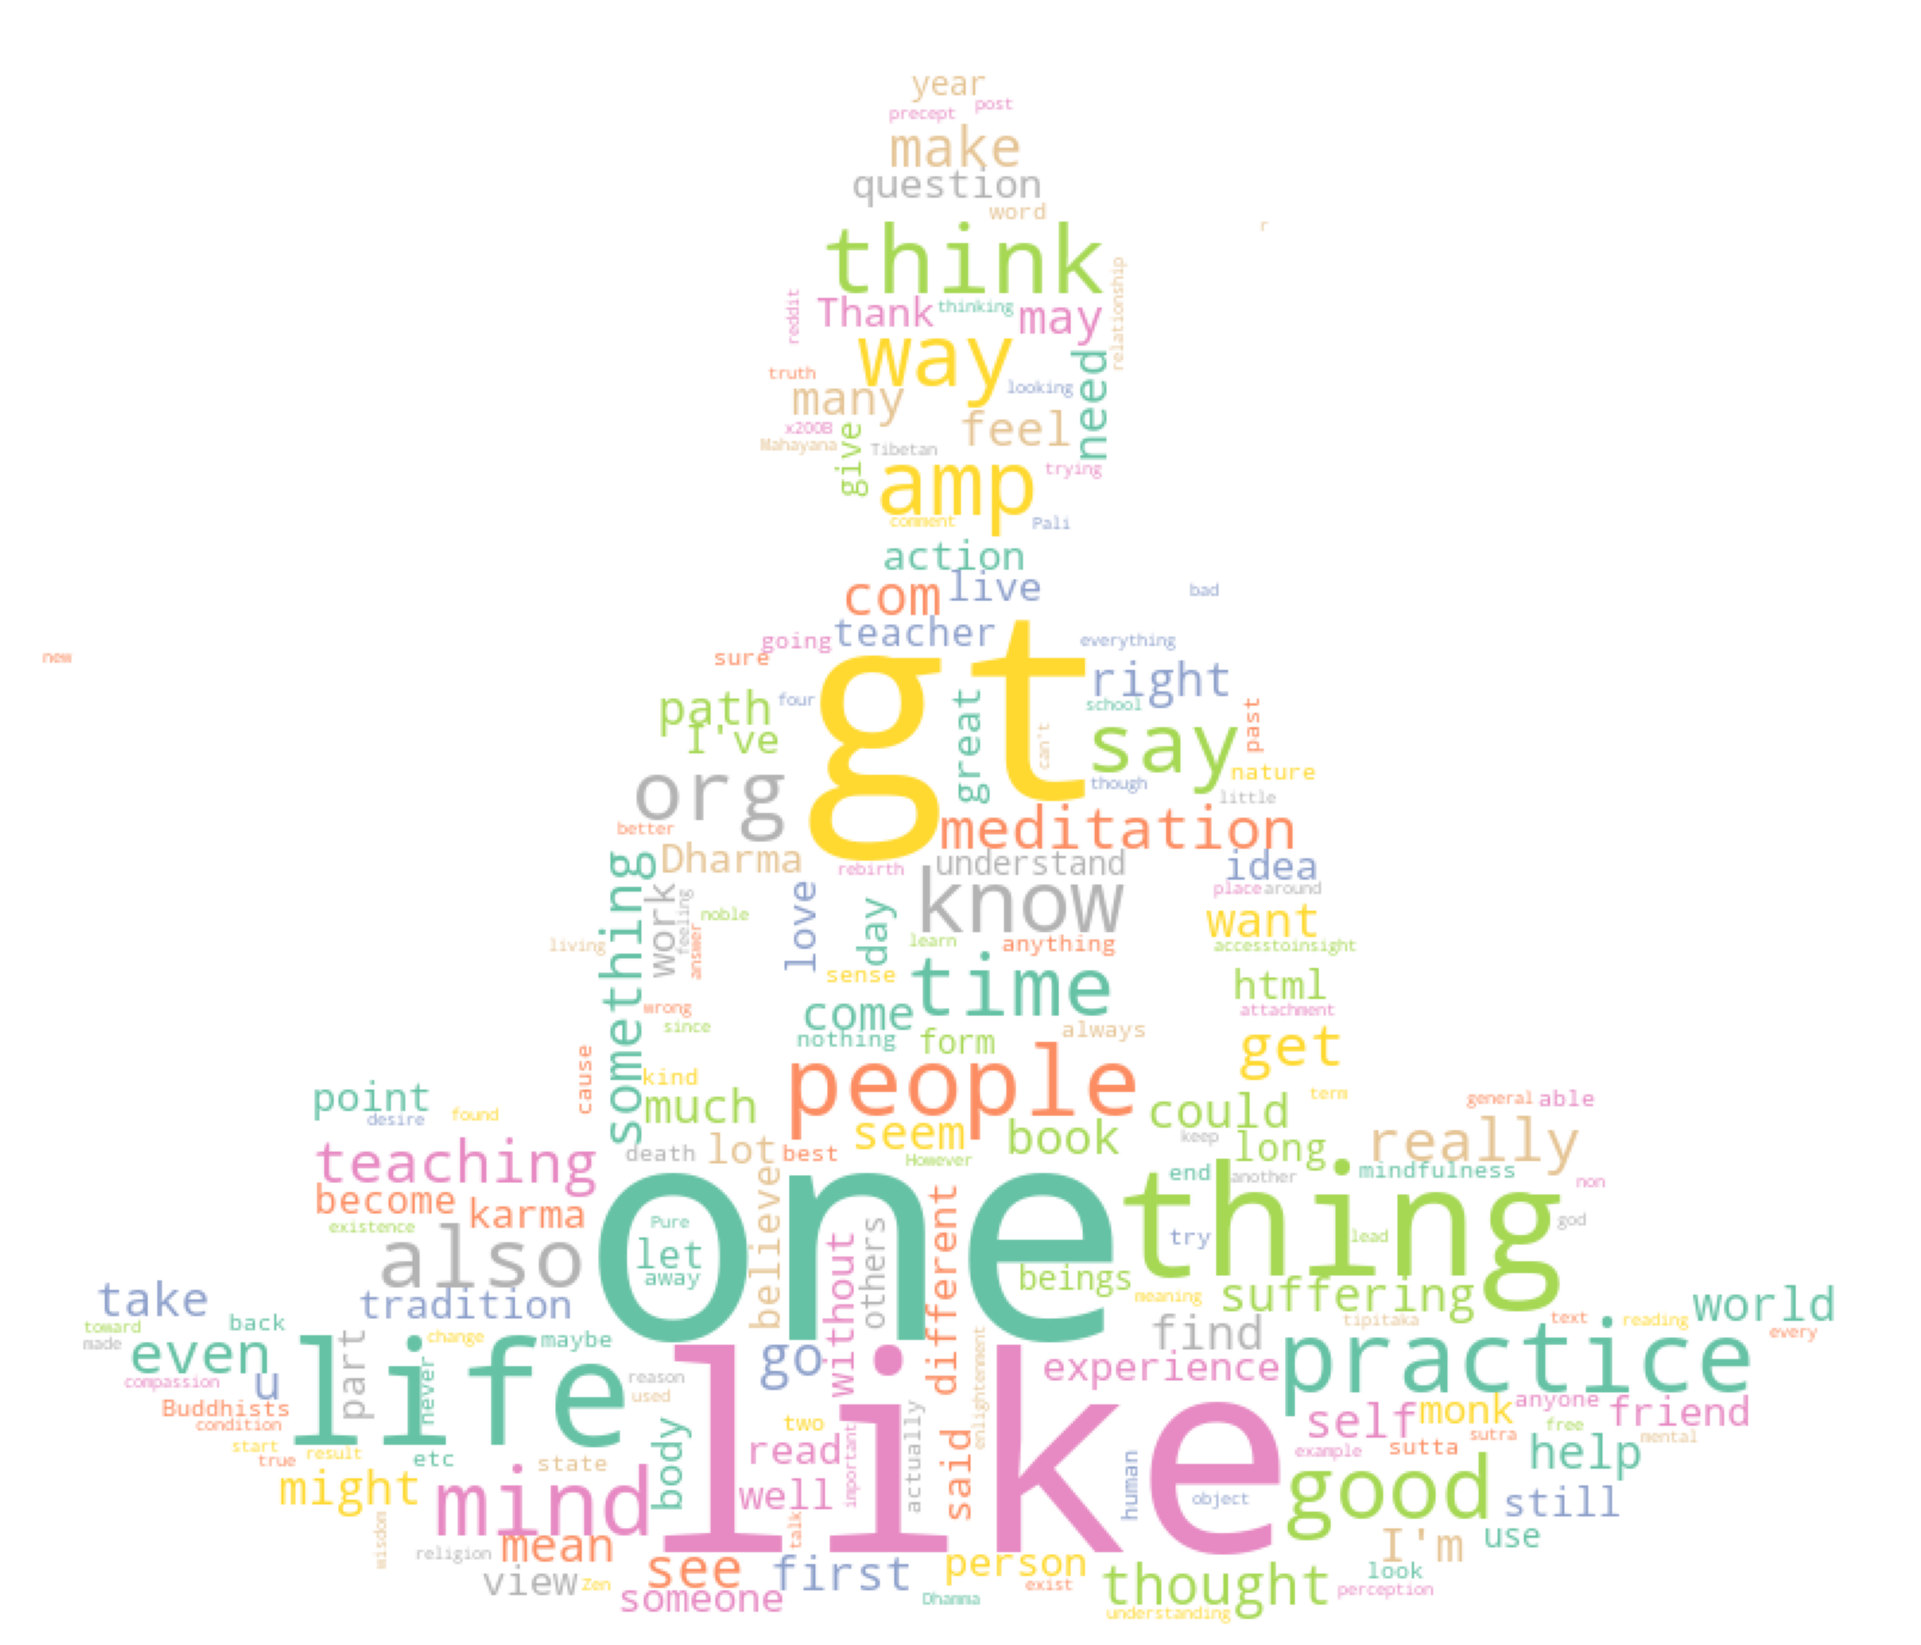

In [78]:
wordcloud_plotter(bdf['all_text'], './media/buddhist_symbol.jpeg')

**Observation:**
- Unsurprisingly, people on Buddhism subreddits often mention the words 'Buddha' and 'Buddhist' as the center of their discussions.
- Interestingly, the word 'one' made a significantly stronger appearance in Buddhism subreddit relative to its Christian counterparts. One the surface level, the word 'one' may signify its numerical meaning. However, upon a closer look Buddhism subreddits frequently used the word as a general meaning of 'an individual'. Some examples:

Examples:
1. **One** can engage with the Dharma as **one** would like with any view whatsoever, but generally speaking rebirth is a central thread in Buddhist doctrine and it is related to what are sometimes called 'right view' and 'wrong view'. Of those, right view is the forerunner. And how is right view the forerunner? **One** discerns wrong view as wrong view, and right view as right view. This is **one's** right view. And what is wrong view? 'There is nothing given, nothing offered, nothing sacrificed.
2. My answer is: keep your attention focused on the work, be alert and ready to handle ably and intelligently any situation which may arise -this is mindfulness. There is no reason why mindfulness should be different from focusing all **one's** attention on **one's** work, to be alert and to be using **one's** best judgment. During the moment one is consulting, resolving, and dealing with whatever arises, a calm heart and self- control are necessary if **one** is to obtain good results.

The overwhelming context of the usage of word 'one' is someone is attempting to provide a life advice to the asking party. Therefore, the word 'one' will not be removed as it contains some semantic context. 

## Sentiment Analysis

Sentiment analysis is an activity to qualify a text to have a positive or negative connotation. There are many ways to perform sentiment analysis. The state-of-the-art method is called BERT (Bidirectional Encoder Representations from Transformers). It was developed by Google AI team which trained the model on in bidirectional manner (in contrast with left to right or right to left only) to better comprehend deeper sense of language context ([source1](https://towardsdatascience.com/bert-explained-state-of-the-art-language-model-for-nlp-f8b21a9b6270), [source2](https://towardsdatascience.com/sentiment-analysis-in-10-minutes-with-bert-and-hugging-face-294e8a04b671)). 

However, for the purpose of this study, a simpler and faster way to produce sentiment analysis is performed based on Valence Aware Dictionary for Sentiment Reasoning (VADER). This approach relies on a dictionary that maps out lexical features to emotion scores and its intensity ([source](https://towardsdatascience.com/sentimental-analysis-using-vader-a3415fef7664#:~:text=VADER%20(%20Valence%20Aware%20Dictionary%20for,intensity%20(strength)%20of%20emotion.&text=VADER%20sentimental%20analysis%20relies%20on,intensities%20known%20as%20sentiment%20scores.))). The intensity is defined based on a few markers such as:
1. Punctuation, e.g. 'the food is good!' is stronger than 'the food is good.'
2. Capitalization, e.g. 'the food is GOOD.' is stronger than 'the food is good.'
3. Degree of modifier, e.g. 'the food is extremely good.' is stronger than 'the food is good.'
4. Conjunction, e.g. 'the food is good but the service is horrible.' signifies a shift in sentiment polarity. 
([source](https://t-redactyl.io/blog/2017/04/using-vader-to-handle-sentiment-analysis-with-social-media-text.html#:~:text=How%20does%20VADER%20work%3F,cases%2C%20how%20positive%20or%20negative.))

The benefit of using VADER are:
1. Quick to run (has been proven to work well even on a live newsfeed)
2. Able to capture sentiment on social media post well even when people are using slang and even emoticons ([source](https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f))

Fortunately for us, there is already an established VADER sentiment analysis library on Python from nltk.org which we can use right from the shelf.

In [37]:
# Instantiate the SentimentIntensityAnalyzer insntance
sia = SentimentIntensityAnalyzer()

# Define a function to return the average sentiment intensity score of the text in each subreddit
def average_score(dataframe):
    total_result = dict()
    columns = ['title', 'selftext', 'all_comments']
    sentiment_scores = ['neg', 'neu', 'pos', 'compound']
    for column in columns:
        sia_scores =  dataframe[column].apply(lambda x: sia.polarity_scores(x))
        column_result = dict()
        for sentiment_score in sentiment_scores:
            total = 0
            for sia_score in sia_scores:
                total += sia_score[sentiment_score]
            column_result[sentiment_score] = total/len(sia_scores)
        total_result[column] = column_result
    return total_result

## Invoke the function
c_sia = average_score(cdf)
b_sia = average_score(bdf)

## Convert the output into a dataframe
pd.concat([pd.DataFrame(c_sia).loc['compound'].rename('Christianity SIA'),
                          pd.DataFrame(b_sia).loc['compound'].rename('Buddhism SIA')],
                         axis=1)

,Christianity SIA,Buddhism SIA
title,0.058067,0.079068
selftext,0.198783,0.234400
all_comments,0.414328,0.433278


**Observations:**
- Both subreddits shows an inclination to spread positivity.
    - Buddhism subreddit seem to have a slightly more positive tone than its counterpart but not by a significant margin.
- This is especially on comments columns. 
    - Example 1: 
        - Original Post: *Last year in August, I had a huge crush on a girl that **rejected** me because of my **creepy/needy** behavior. I've also told her best friend some **embarassing** things I've done as a child. The crush turned into an **obsession** without me knowing it....*
        - Comments: *Life is a process without immediate **gratification**. You will probably make similar mistakes multiple times before you are able to identify the *ssue and make slow and steady steps towards change. In order to do this, you HAVE to have **compassion** on yourself as if you are another person, as if you were someone else you **love and have compassion for** .*
    - Example 2: 
        - Original Post: *I'm **tired** of my mind thinking these thoughts these have been **ruining** my sanity and I don't think I can take it, I'm not giving up, I'm just saying I'm getting **annoyed** with all of the things going in my mind, this is a call for help...*
        - Comments: *... These are the years where we figure out who we are and who **God** is. Bring your feelings and emotions under control and build your own personal relationship with **God through Jesus Christ**. Design your own values and morality with the leading of **Holy Spirit**...*

# Dataset and NLP Model Selection

## Dataset Selection

Currently we have the selftext, title and comment sections to train our NLP model. In previous section, we can see that the word spread across the sections varied, especially for Buddhism subreddit. Therefore, the result of machine learning model may also vary when different dataset is used. 

In this section, we will feed multiple datasets consisting on selftext only, selftext+title, selftext+comments and selftext+title+comments into a single vectorizer and classifier to perform prediction of which subreddit an unseen post belongs to. The dataset that is fed to the model that performs the best at this classification problem would subsequently be used as the source of text in our analysis. 

In [38]:
# Convert target variable to 0 for Christianity and 1 for Buddhism
cdf['target'] = 0
bdf['target'] = 1

### Selftext Data Only

In [39]:
# Define a function to combine the text from both subreddits into two arrays of text (X) and target variable (y)
def combine_dataframe(df1, df2, include_title=True, include_comment=True): 
    
    # Define if the text to be analyzed contains selftext and title and/or comments
    if include_title & include_comment:
        column_name = 'all_text'
    elif include_title & (not include_comment):
        column_name = 'title_selftext'
    elif (not include_title) & include_comment:
        column_name = 'selftext_comment'
    elif (not include_title) & (not include_comment):
        column_name = 'selftext'
    
    # Combine both dataframe and split them into X and y
    X = pd.concat([df1[column_name], df2[column_name]], axis=0, ignore_index=True)
    y = pd.concat([df1['target'], df2['target']], axis=0, ignore_index=True)
    return X, y

## Invoke the function
X, y = combine_dataframe(cdf, bdf, include_title=False, include_comment=False)

In [40]:
# Define a function to delete empty text on the entry, if any
def remove_empty_text(X, y):
    ind = X[X==''].index
    X.drop(labels=ind, axis=0, inplace=True)
    y.drop(labels=ind, axis=0, inplace=True)
    X.reset_index(drop=True, inplace=True)
    y.reset_index(drop=True, inplace=True)

## Invoke the function
remove_empty_text(X, y)

In [41]:
# Print target variable to check for imbalance class
y.value_counts(normalize=True)

0    0.530795
1    0.469205
Name: target, dtype: float64

In [42]:
# Define a specific random state
random_state = 0

In [43]:
# Split the data into train and validation set
Xtrain, Xval, ytrain, yval = train_test_split(X, y, stratify=y, test_size=0.33, random_state=random_state)

# Fit and transform the text from train and validation set
cvec = CountVectorizer(tokenizer=convert_updated)
Xtrain_c = cvec.fit_transform(Xtrain)
Xval_c = cvec.transform(Xval)

# Train a classifier model based on Logistic Regression
lr = LogisticRegression(max_iter = 1000)
lr.fit(Xtrain_c, ytrain)
train_score = lr.score(Xtrain_c, ytrain)
val_score = lr.score(Xval_c, yval)

# Print accuracy of training and test dataset
print("Training dataset accuracy: {}".format(train_score))
print("Validation dataset accuracy: {}".format(val_score))

# Create a dictionary to keep the score values
score_summary = dict()
score_dict = dict()
score_dict['Training Accuracy'] = train_score
score_dict['Validation Accuracy'] = val_score
score_summary['Selftext Only'] = score_dict

Training dataset accuracy: 0.9949832775919732
Validation dataset accuracy: 0.8169491525423729


### Selftext and Title Only

In [44]:
# Combine Christianity and Buddhism dataframe and split the data into X and y
X, y = combine_dataframe(cdf, bdf, include_title=True, include_comment=False)

# Remove empty rows, if any
remove_empty_text(X, y)

# Print target variable to check for imbalance class
y.value_counts(normalize=True)

0    0.5
1    0.5
Name: target, dtype: float64

In [45]:
# Split the data into train and validation set
Xtrain, Xval, ytrain, yval = train_test_split(X, y, stratify=y, test_size=0.33, random_state=random_state)

# Fit and transform the text from train and validation set
cvec = CountVectorizer(tokenizer=convert_updated)
Xtrain_c = cvec.fit_transform(Xtrain)
Xval_c = cvec.transform(Xval)

# Train a classifier model based on Logistic Regression
lr = LogisticRegression(max_iter = 1000)
lr.fit(Xtrain_c, ytrain)
train_score = lr.score(Xtrain_c, ytrain)
val_score = lr.score(Xval_c, yval)

# Print accuracy of training and test dataset
print("Training dataset accuracy: {}".format(train_score))
print("Validation dataset accuracy: {}".format(val_score))

# Input score value into the dictionary
score_dict = dict()
score_dict['Training Accuracy'] = train_score
score_dict['Validation Accuracy'] = val_score
score_summary['Selftext and Title'] = score_dict

Training dataset accuracy: 0.9904420549581839
Validation dataset accuracy: 0.864406779661017


### Selftext and Comments Only

In [46]:
# Combine Christianity and Buddhism dataframe and split the data into X and y
X, y = combine_dataframe(cdf, bdf, include_title=False, include_comment=True)

# Remove empty rows, if any
remove_empty_text(X, y)

# Print target variable to check for imbalance class
y.value_counts(normalize=True)

0    0.5
1    0.5
Name: target, dtype: float64

In [47]:
# Split the data into train and validation set
Xtrain, Xval, ytrain, yval = train_test_split(X, y, stratify=y, test_size=0.33, random_state=random_state)

# Fit and transform the text from train and validation set
cvec = CountVectorizer(tokenizer=convert_updated)
Xtrain_c = cvec.fit_transform(Xtrain)
Xval_c = cvec.transform(Xval)

# Train a classifier model based on Logistic Regression
lr = LogisticRegression(max_iter = 1000)
lr.fit(Xtrain_c, ytrain)
train_score = lr.score(Xtrain_c, ytrain)
val_score = lr.score(Xval_c, yval)

# Print accuracy of training and test dataset
print("Training dataset accuracy: {}".format(train_score))
print("Validation dataset accuracy: {}".format(val_score))

# Input score value into the dictionary
score_dict = dict()
score_dict['Training Accuracy'] = train_score
score_dict['Validation Accuracy'] = val_score
score_summary['Selftext and Comments'] = score_dict

Training dataset accuracy: 0.9629629629629629
Validation dataset accuracy: 0.9007263922518159


### Selftext, Title and Comments

In [48]:
# Combine Christianity and Buddhism dataframe and split the data into X and y
X, y = combine_dataframe(cdf, bdf, include_title=True, include_comment=True)

# Remove empty rows, if any
remove_empty_text(X, y)

# Print target variable to check for imbalance class
y.value_counts(normalize=True)

0    0.5
1    0.5
Name: target, dtype: float64

In [49]:
# Split the data into train and validation set
Xtrain, Xval, ytrain, yval = train_test_split(X, y, stratify=y, test_size=0.33, random_state=random_state)

# Fit and transform the text from train and validation set
cvec = CountVectorizer(tokenizer=convert_updated)
Xtrain_c = cvec.fit_transform(Xtrain)
Xval_c = cvec.transform(Xval)

# Train a classifier model based on Logistic Regression
lr = LogisticRegression(max_iter = 1000)
lr.fit(Xtrain_c, ytrain)
train_score = lr.score(Xtrain_c, ytrain)
val_score = lr.score(Xval_c, yval)

# Print accuracy of training and test dataset
print("Training dataset accuracy: {}".format(train_score))
print("Validation dataset accuracy: {}".format(val_score))

# Input score value into the dictionary
score_dict = dict()
score_dict['Training Accuracy'] = train_score
score_dict['Validation Accuracy'] = val_score
score_summary['Selftext, Title and Comments'] = score_dict

Training dataset accuracy: 1.0
Validation dataset accuracy: 0.9346246973365617


**Summary:**

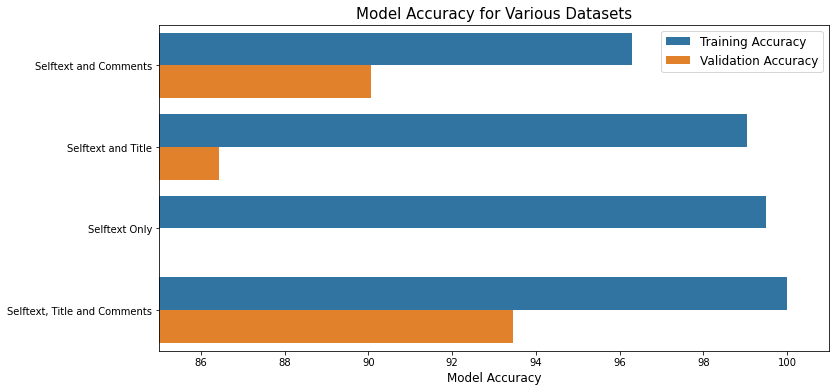

In [50]:
# To convert score into dataframe format
score_df = pd.DataFrame(score_summary).T.sort_values(by='Training Accuracy', ascending=True)
score_df.reset_index(level=0, inplace=True)
score_df.rename(columns={'index': 'Sections'}, inplace=True)
score_df = score_df.melt(id_vars='Sections', var_name='Dataset', value_name='Model Accuracy')

# Plot the score for different sections
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x=score_df["Model Accuracy"]*100, y="Sections", hue="Dataset", data=score_df, ax=ax)
ax.set_title('Model Accuracy for Various Datasets', fontsize=15)
ax.set_xlim((85,101))
ax.set_xlabel('Model Accuracy', fontsize=12)
ax.set_ylabel('')
ax.legend(fontsize=12);

Four types of datasets are trained to the Logistic Regression model (random state = 0). As seen, adding the comments into analysis manage to reduce the difference between training and validation dataset (improvement in model variance). 

**Note:**
- This analysis is repeated a few more times with different random state values (0-4 inclusive) to ensure that observation above is not the result of mere coincidence. The result has been consistent. Therefore, title and comment section will be included to train the classification model subsequently.
- It is interesting to observe that analyzing only the selftext results in an overfitted model. One possible reason for this phenomenon is that the selftext does not contain sufficient words that is specific to the subreddit. Some example:
    - *What is your opinion on paying for sex? Could you please explain your position.*
    - *Hi -- I made a podcast sharing my thoughts on the path after over a decade of study, 30 countries traveled to, and very intense practices from many traditions*
    - *Why did he need to be asked to do it ?*

### Final Dataset

In [51]:
# Combine Christianity and Buddhism dataframe and split the data into X and y
X, y = combine_dataframe(cdf, bdf, include_title=True, include_comment=True)

# Remove empty rows, if any
remove_empty_text(X, y)

# Print target variable to check for imbalance class
y.value_counts(normalize=True)

0    0.5
1    0.5
Name: target, dtype: float64

## Model Selection

In [52]:
# Split the data into train and test set
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, stratify=y, test_size=0.33, random_state=0)

### Baseline Model

Before we run the classification model, we will measure the efficacy of baseline model, i.e. predicting all the dataset based on the most often recurring class. 

In [53]:
y.value_counts(normalize=True)

0    0.5
1    0.5
Name: target, dtype: float64

Both classes occurs in the same manner. Therefore, the prediction will be as good as 50% accuracy if it always predict all dataset as Buddhism or Christianity for all posts given to it.

### Vectorizer Selection

#### Count Vectorizer

In [54]:
# Define a pipeline
pipe = Pipeline([
    ('cvec', CountVectorizer(tokenizer=convert_updated)),
    ('lr', LogisticRegression(max_iter=1000))
])

# Define the pipeline parameter
pipe_params = {
    'cvec__max_df':[0.6, 0.7, 0.8],
    'cvec__min_df':[0, 0.01, 0.03],
    'cvec__max_features':[1000, 2000, 3000],
    'cvec__ngram_range': [(1, 1), (1, 2)],
}

# Instantiate gridsearch instance
gs = GridSearchCV(pipe, pipe_params, cv=5, verbose=1)

In [55]:
# Fit the model and print the time taken to fit the model
start_time = time.time()
gs.fit(Xtrain, ytrain)
print("{}".format(time.time() - start_time))

Fitting 5 folds for each of 54 candidates, totalling 270 fits
157.20555329322815


In [56]:
# Define a function to plot a confusion matrix and multiple measures of model goodness
def metric_printer(model, model_name, Xtrain, ytrain, Xtest, ytest):
    train_score = model.score(Xtrain, ytrain)
    test_score = model.score(Xtest, ytest)
    preds = model.predict(Xtest)
    roc = roc_auc_score(ytest, preds)
    recall = recall_score(ytest, preds)
    precision = precision_score(ytest, preds)
    f_score = f1_score(ytest, preds)
    
    figs, axs = plt.subplots(ncols=2, figsize=(16,5))
    figs.suptitle(model_name, fontsize=15)
    plot_confusion_matrix(model, Xtest, ytest, display_labels=['Christianity', 'Buddhism'],
                                     cmap=plt.cm.Blues, ax=axs[0])
    axs[0].grid(False)
    
    labels = ['Test Accuracy', 'Train Accuracy',  'ROC-AUC Score', 'Recall', 'Precision', 'F1 Score']
    values = [test_score, train_score, roc, recall, precision, f_score]
    axs[1].barh(labels, values)
    for i, value in enumerate(values):
        axs[1].text(value, i, str(round(value*100,1)) + '%', ha='left', fontsize=12)
    axs[1].grid(False)    
    return confusion_matrix(ytest, preds)

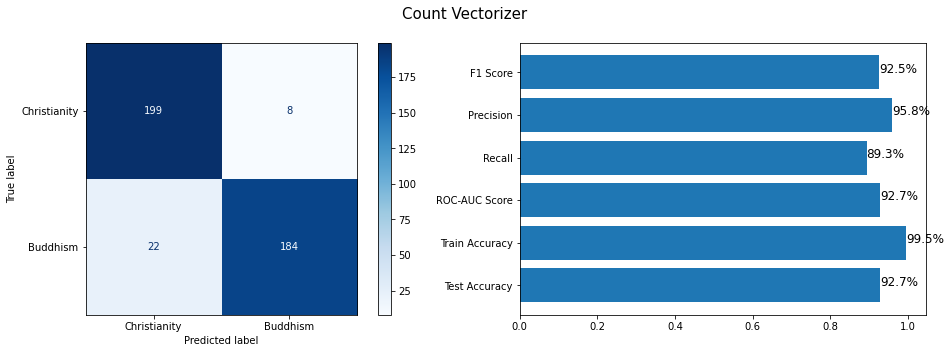

In [57]:
# Print the model metric
metric_printer(gs, 'Count Vectorizer', Xtrain, ytrain, Xtest, ytest);

**Note:**
- The best estimator parameters obtained by gridsearch is showing values in between the search range defined. Therefore, we can safely assume that the model has reached its global optimum.

#### Tf-Idf Vectorizer

In [58]:
# Define a pipeline
pipe = Pipeline([
    ('tfidf', TfidfVectorizer(tokenizer=convert_updated)),
    ('lr', LogisticRegression(max_iter=1000))
])

# Define the pipeline parameter
pipe_params = {
    'tfidf__max_df':[0.9, 1.0],
    'tfidf__min_df':[0, 0.01, 0.03],
    'tfidf__max_features':[1000, 1500, 2000],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
}

# Instantiate gridsearch instance
gs = GridSearchCV(pipe, pipe_params, cv=5, verbose=1)

In [59]:
# Fit the model and print the time taken to fit the model
start_time = time.time()
gs.fit(Xtrain, ytrain)
print("Run time: {:0.1f}".format(time.time() - start_time))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Run time: 104.4


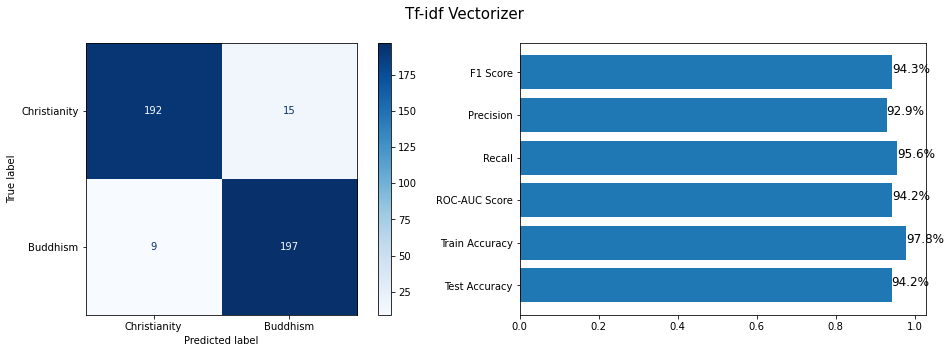

In [60]:
# Print the model metric
metric_printer(gs, 'Tf-idf Vectorizer', Xtrain, ytrain, Xtest, ytest);

**Note:**
- The best estimator parameters obtained by gridsearch is showing values in between the search range define earlier. Therefore, we can safely assume that the model has reached its global optimum.

**Summary:**

| Vectorizer        | Accuracy on Training set | Accuracy on Testing set | ROC-AUC Score | Recall Score | Precision Score | F1 Score |
|-------------------|:-------------:|:-------------:|:-------------:|:------------:|:---------------:|:--------:|
| CountVectorizer   |     0.966     |     0.956     |     0.956     |     0.922    |      0.99       |   0.955  |
| Tf-Idf Vectorizer |     0.986     |     0.966     |     0.966     |     0.971    |      0.962      |   0.966  |

Based on the score above, it can be seen that there is no single vectorizer that performs better than one another. 
Overall, Tf-idf seems to perform slightly better than CountVectorizer. Therefore, to simplify the workflow, subsequently only Tf-idf Vectorizer will be used for the Estimator Selection.

### Classifier Selection

In [61]:
# Define a function to instantiate a pipeline, run the gridsearch and return best pipeline parameters
def model_generator(model_names, classifiers, parameters, Xtrain, ytrain):
    ## Declare an empty dictionary to contain the pipeline models
    gs_dic = dict()
    
    ## Iterate to train each classifier with their respective pipeline parameters
    for model_name, classifier, parameter in zip(model_names, classifiers, parameters):
        ## Instantiate the pipeline
        pipe = Pipeline([
            ('tfidf', TfidfVectorizer(tokenizer=convert_updated,
                                      max_df=0.9,
                                      min_df=0,
                                      max_features=2000,
                                      ngram_range=(1, 2))),
            ('clf', classifier),
        ])
        
        ### Instantiate the gridsearch instance within the dictionary
        gs_dic[model_name] = GridSearchCV(pipe, param_grid=parameter)
        
        ### Capture the start and stop time to measure the time taken to fit the classifier model
        start_time = time.time()
        
        ### Fit the model that is already instantiate inside the gs_dic dictionary 
        gs_dic[model_name].fit(Xtrain, ytrain)
        
        ### Print the time taken to fit the classifier model
        print("Time taken to fit {} models: {} seconds".format(model_name, round(time.time() - start_time),1))
        
        ### Print the metric of the current model
        metric_printer(gs_dic[model_name].best_estimator_, model_name, Xtrain, ytrain, Xtest, ytest)
        
    ## Return the gridsearch result within the dictionary
    return gs_dic

Time taken to fit Logistic Regression models: 4 seconds
Time taken to fit Multinomial Naive Bayes models: 20 seconds
Time taken to fit K-Neighbors Classifier models: 59 seconds
Time taken to fit Decision Tree Classifier models: 79 seconds
Time taken to fit Bagging Classifier models: 25 seconds
Time taken to fit Random Forest Classifier models: 150 seconds
Time taken to fit Extra Trees models: 150 seconds
Time taken to fit AdaBoost models: 39 seconds
Time taken to fit Gradient Boosting Classifier models: 115 seconds
Time taken to fit Support Vector Classifier models: 98 seconds

Total time taken to run 10 models: 753 seconds


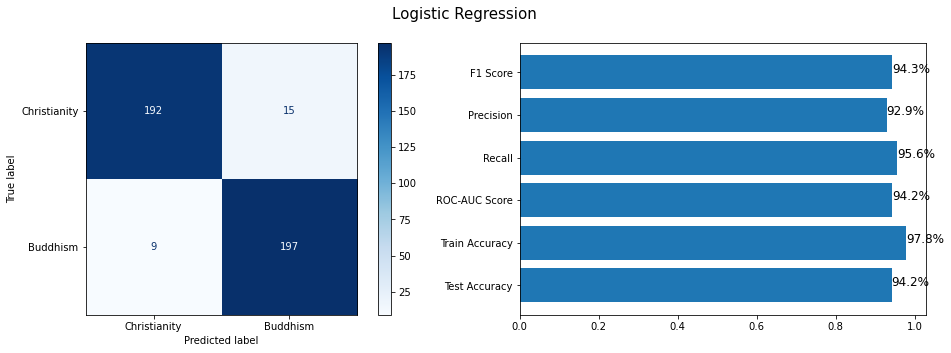

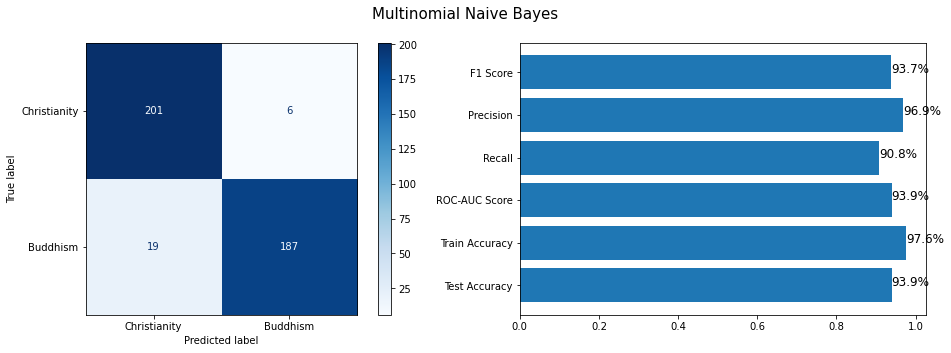

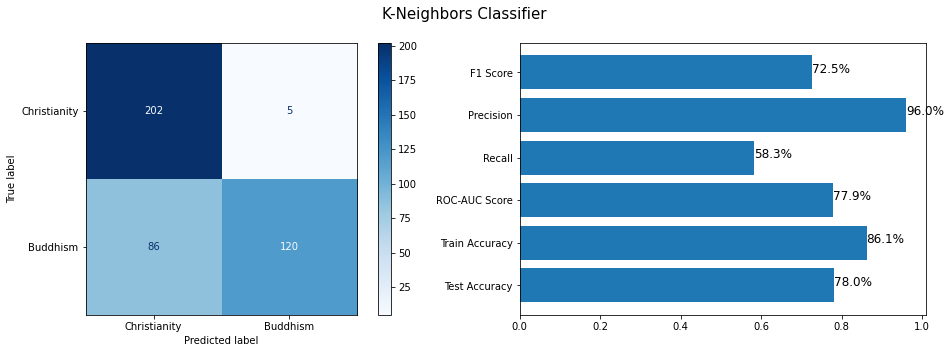

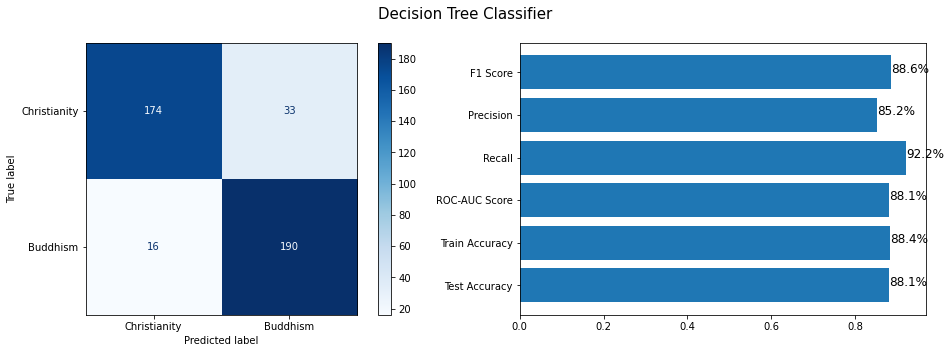

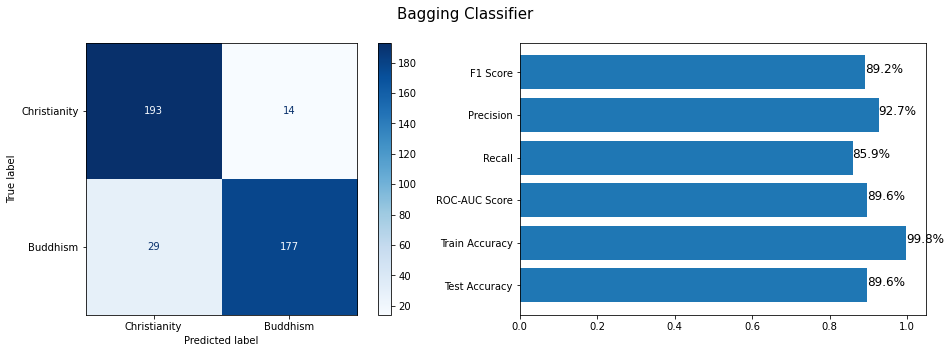

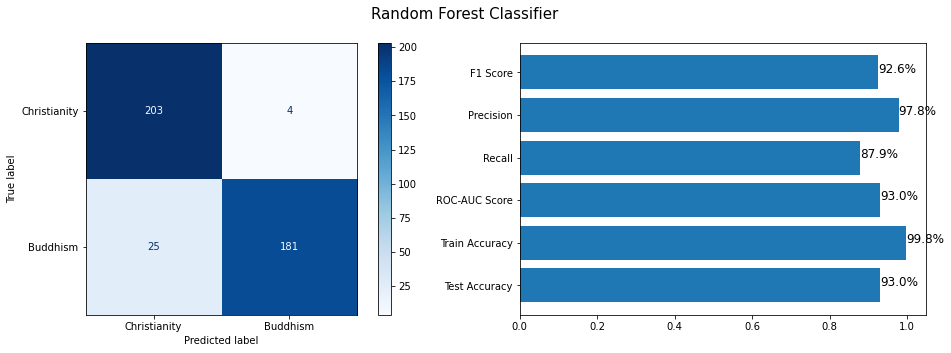

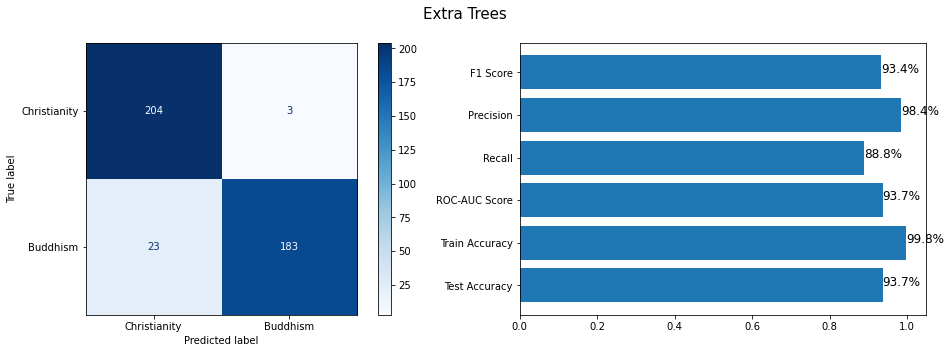

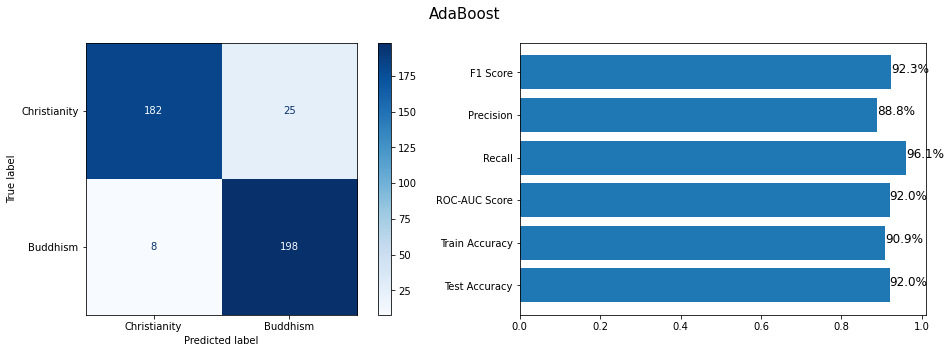

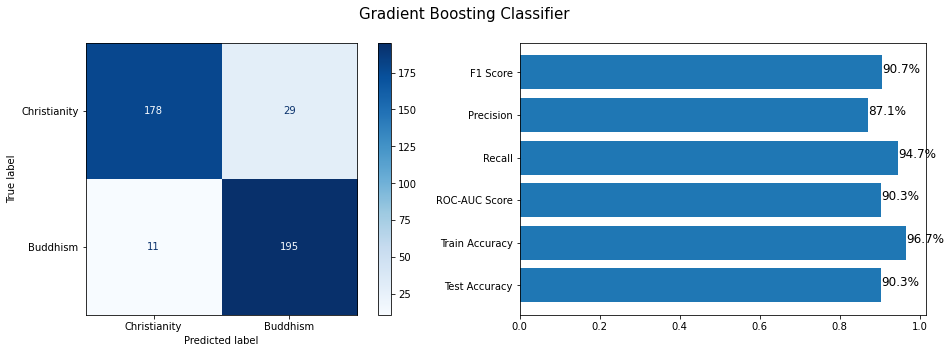

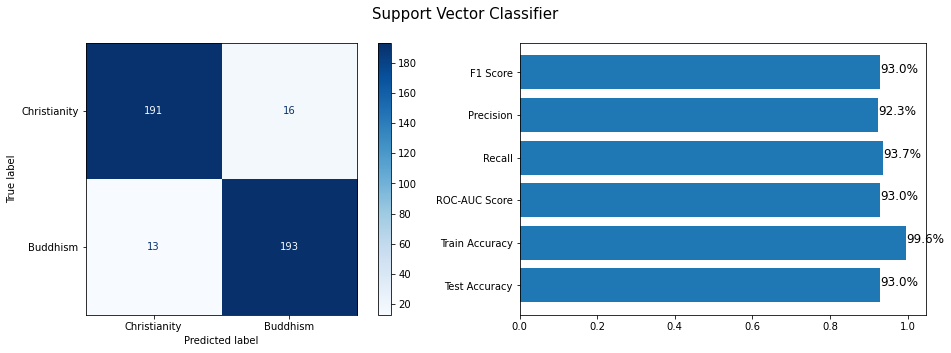

In [62]:
# This step is performed to run the training of classifiers by invoking the function defined above 

## List down the name of classifier for easy identification later on
model_names = [
    "Logistic Regression",
    "Multinomial Naive Bayes",
    "K-Neighbors Classifier",
    "Decision Tree Classifier",
    "Bagging Classifier",
    "Random Forest Classifier",
    "Extra Trees",
    "AdaBoost",
    "Gradient Boosting Classifier",
    "Support Vector Classifier",
]

## Define all the classifiers chosen for the training
classifiers = [
    LogisticRegression(),
    MultinomialNB(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    BaggingClassifier(),
    RandomForestClassifier(),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    SVC(),
]

## Define all parameters for the classifiers gridsearch
parameters = [
    {
        # Logistic Regression
        # all default parameters
    },
    {
        # Multinomial NB
        'clf__alpha' : [0.6, 0.8, 1],
        'clf__fit_prior': [True, False], 
    },
    {
        # K-Neighbors Classifier
        'clf__n_neighbors' : [5, 7, 9],    
        'clf__p': [1, 2],                       # to indicate the distance formula used (l1), (l2)
        'clf__leaf_size': [25, 30, 35]
    },
    {
        # Decision Tree Classifier   
        'clf__min_samples_split': [2, 3],  
        'clf__min_samples_leaf': [1, 2], 
        'clf__max_features': [None, 'auto'],
        'clf__ccp_alpha': [0, 0.01, 0.1],
    },
    {
        # Bagging Classifier
        'clf__n_estimators' : [10, 15],    
        'clf__max_features': [1, 0.75, 0.5],                       
    },
    {
        # Random Forest Classifier
        'clf__n_estimators' : [75, 100, 125],    
        'clf__min_samples_split': [2, 3],  
        'clf__min_samples_leaf': [1, 2],   
        'clf__ccp_alpha': [0, 0.01, 0.1],
    },
    {
        # Extra Trees Classifier
        'clf__n_estimators' : [75, 100, 125],     
        'clf__min_samples_split': [2, 3],  
        'clf__min_samples_leaf': [1, 2],   
        'clf__ccp_alpha': [0, 0.01, 0.1],
    },
    {
        # Adaboost Classifier
        'clf__n_estimators' : [25, 50, 75],    
        'clf__learning_rate' : [0.8, 0.9, 1.0],       
    },
    {
        # Gradient Boosting Classifier
        'clf__loss' : ['deviance', 'exponential'],    
        'clf__subsample' : [0.9, 1], 
        'clf__ccp_alpha': [0, 0.1],
        'clf__learning_rate': [0.05, 0.1]
    },
    {
        # Support Vector Classifier
        'clf__kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],    
        'clf__degree' : [2, 3, 4],
        'clf__gamma': ['auto', 'scale']
    },
]

# Capture the time taken to run the gridsearch over all the classifiers
start_time = time.time()

# Invoke the function and contain the best models dictionary
best_models = model_generator(model_names, classifiers, parameters, Xtrain, ytrain)

# Print the time taken to run the gridsearch over all the classifiers
print("\nTotal time taken to run {} models: {} seconds".format(len(classifiers), round(time.time()-start_time)))

**Observation:**
- We have trained many classification models based on the Tf-idf vectorization output. It can be observed that **Logistic Regression**, despite being one of the simplest model, has one of the best performance in terms of bias and variance. More impressively, this is done on 'vanilla' settings from sklearn library. 
- However, there are also a few other notable classifiers that has a good accuracy performance on both training and testing data. 

|     | Classifier Name                    | Training Dataset Accuracy | Testing Data Accuracy |
|-----|------------------------------------|:-------------------------:|:---------------------:|
| 1.  | Logistic Regression Classifier     |           98.0%           |         93.2%         |
| 2.  | Multinomial Naive Bayes Classifier |           97.6%           |         93.9%         |
| 3.  | Extra Trees Classifier             |           98.3%           |         95.2%         |
| 4.  | Support Vector Classifier          |           99.6%           |         92.5%         |
| 5.  | Random Forest Classifier           |           99.3%           |         92.0%         |


### Summary on Classifier Selection

As the main purpose of running the NLP is to obtain insight on how each tokens affect the likelihood of a post to be classified in the correct subreddit, **Logistic Regression** comes out at the top due to its high interpretability while also having high classifying accuracy. 

# Final Model 

## AUC-ROC Curve  

Let us go deeper in understanding the performance of the Logistic Regression by plotting the ROC-AUC curve.

Logistic Regression: ROC-AUC = 0.991


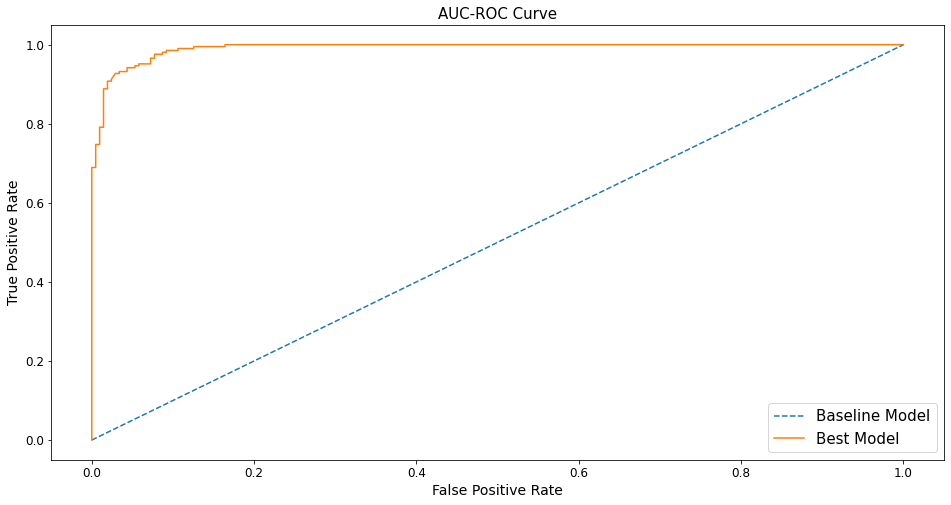

In [63]:
# Return probability of each post being from Buddhism or Christianity subreddit based on the model
pred_proba = best_models['Logistic Regression'].predict_proba(Xtest)[:,1]

# Return the false positive and true positive rate
fpr, tpr, _ = roc_curve(ytest, pred_proba)

# Plot the AUC-ROC curve
## Prepare the plot
plt.figure(figsize=(16,8))
plt.title('AUC-ROC Curve', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)

## Actual plotting
plt.plot((0,1), (0, 1), linestyle='--', label='Baseline Model')
plt.plot(fpr, tpr, label='Best Model')
plt.legend(fontsize=15)

# Printing Area Under Curve score
auc = roc_auc_score(ytest, pred_proba)
print('Logistic Regression: ROC-AUC = {:.3f}'.format(auc))

**Observation:**
- It is clear that the Logistic Regression model has a very high AUC, therefore, we can be confident in our deduction on the direction and strength of a token influencing the the prediction result. 

## Identification of Jargons 

Logistic Regression is a special case of Generalized Linear Model with logit as the link function to its predictor variables. 

In general, Logistic Regression: <br>
$logit(p) = \sum_{i=0}^n \beta_ix_i$
<br> or <br>
$p/(p-1) = e^(\sum_{i=0}^n \beta_ix_i)$

Therefore, by obtaining the coefficient of the token, we can obtain specific jargon that is strongly correlated to each subreddit.

In [64]:
# Build dataframe containing tokens and their logistic coefficient
## Extract coefficient
coef = pd.DataFrame(best_models['Logistic Regression'].best_estimator_.steps[1][1].coef_).T
coef.rename(columns={0:'coef'}, inplace=True) # rename column in dataframe

## Extract token
coef['token'] = pd.DataFrame(best_models['Logistic Regression'].best_estimator_.steps[0][1].get_feature_names())

## Extract token that strongly link the post to Buddhism or Christianity
### Sort dataframe based on its coefficient
coef.sort_values(by='coef', ascending=True, inplace=True)

### Christianity related tokens
c_tokens = coef.head(10).copy()

### Buddhism related tokens
b_tokens = coef.tail(10).copy()
b_tokens.sort_values(by='coef', ascending=False, inplace=True)

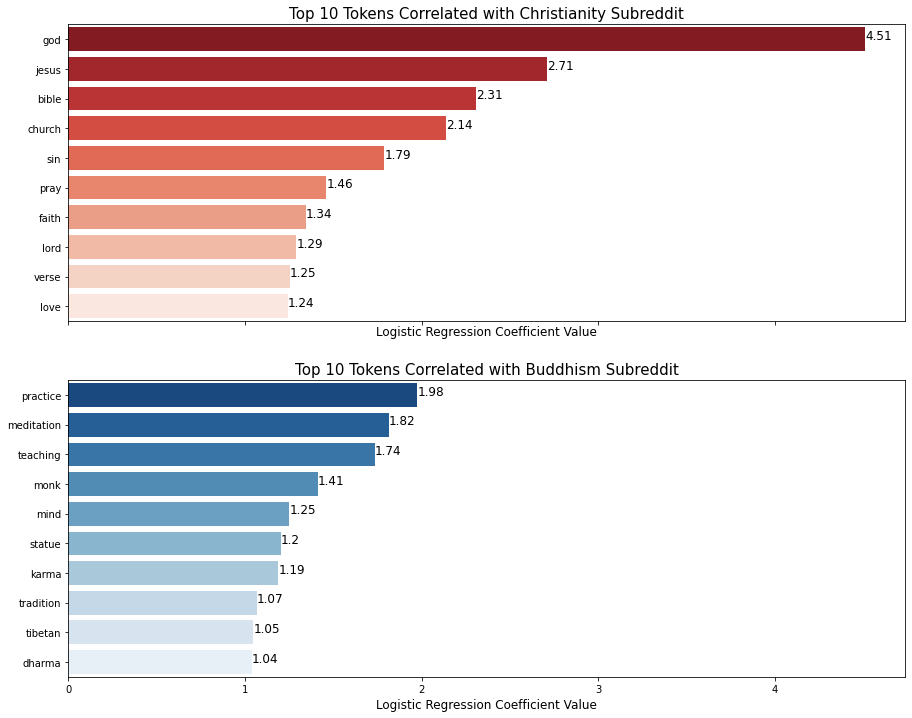

In [65]:
# Build function to plot the coefficient
def token_plotter(dfs, subreddit_names, palettes):
    fig, ax = plt.subplots(nrows=2, figsize=(15,12), sharex=True)
    ax = ax.ravel()
    
    ## Iterate to dataframe of both subreddits to plot a barplot each
    for no, df in enumerate(dfs):
        subreddit_name = subreddit_names[no]
        palette = palettes[no]
        
        ### To switch the direction of coefficient for plotting purposes
        ### Token with negative coefficient signifies a correlation to Christianity subreddit
        if df.iloc[0,:]['coef']<0:
            sns.barplot(data=df, x=-df['coef'], y='token', palette=palette, ax=ax[no])
            for i, coef in enumerate(df['coef']):
                ax[no].text(-coef, i, -round(coef,2), ha='left', fontsize=12)
        ### Token with negative coefficient signifies a correlation to Christianity subreddit
        else: 
            sns.barplot(data=df, x=df['coef'], y='token', palette=palette, ax=ax[no])
            for i, coef in enumerate(df['coef']):
                ax[no].text(coef, i, round(coef,2), ha='left', fontsize=12)

        ax[no].set_ylabel('')
        ax[no].set_xlabel('Logistic Regression Coefficient Value', fontsize=12)
        ax[no].set_title("Top {} Tokens Correlated with {} Subreddit".format(len(df), subreddit_name), fontsize=15)

## Invoke the function
token_plotter([c_tokens, b_tokens], ['Christianity', 'Buddhism'], ['Reds_r', 'Blues_r'])

**Observation:**
- The results are not at all surprising. The word 'God' in a post is a very strong indication that a post belongs to Christianity subreddit. It is even almost two times as strong of a predictor compared to the second word in the list, i.e. 'Christian'. The word 'Buddhist' and 'Buddha' comes at the top two of a predictor for Buddhism subreddit. 
- Observing the coefficient value we know that one value increase in Tf-Idf score of the word 'God' will increase the odds of a post belongs to Christianity subreddit by $e^{4.36}=78.2$ times. On the other hand, the word 'practice' will increase the odds of a post belongs to Buddhism subreddit by $e^{1.99}=7.31$. 
    - **Note that Tf-idf score is usually <<1** due to the normalization effect it has, therefore, inclusion of a specific word will not result in a unit value increase in Tf-idf score.
- Finally, all the words appearing in the lists can be classify into a few distinct categories:

| Topic                                     | Token Primarily used in <br>Christian Subreddit | Token Primarily used in <br>Buddhism Subreddit              |
|:-------------------------------------------|:---------------------:|:---------------------------------:|
| Teacher/ Supreme figure                        | Lord, God | Buddha                          |
| Knowledge Transmission <br>and Repository | Bible               | Teaching, Dharma                |
| Object/ Place                                  |  Verse, Church          | Statue, Tibetan       |
| Doctrine                                  | Faith, Love, sin        | Karma, Mind                     |
| Activity                                  | Pray      | Practice, Meditation |

Knowing the jargons that able to strongly suggest the origin of a post, we now need to see what type of posts which are misclassified.

## Misclassified Posts

By observing the misclassified posts, we can gain an insight of the weakness of the model which prevents it in correctly classifying these posts. Having this insight enables us to propose the model improvement or suggest a workaround.

In [66]:
# Create dataframe listing probability of each post belongs to each post based on the model
preds_df = pd.DataFrame(best_models['Logistic Regression'].predict(Xtest), index=Xtest.index)
preds_df.rename(columns={0: 'predicted'}, inplace=True)

proba_df = pd.DataFrame(best_models['Logistic Regression'].predict_proba(Xtest), index=Xtest.index)
proba_df.rename(columns={ 0: 'prob_c', 1: 'prob_b'}, inplace=True)

preds_df = preds_df.merge(proba_df, left_index=True, right_index=True)
# Merge with actual post label
preds_df = preds_df.merge(pd.DataFrame(ytest), left_index=True, right_index=True)
preds_df.rename(columns={'target':'actual'}, inplace=True )
preds_df = preds_df[['prob_c', 'prob_b', 'predicted', 'actual']]

# Show misclassified posts indexes
misc_posts = preds_df[preds_df['predicted']!=preds_df['actual']].sort_values(by=['predicted','prob_c'], ascending=[True, False])
print("For 'predicted' and 'actual' columns: 0 refers to 'Christianity Subreddit' while 1 refers to 'Buddhism Subreddit'")
print("  -  0 refers to 'Christianity Subreddit'")
print("  -  1 refers to 'Buddhism Subreddit'")
print("List of Misclassified Posts:")
misc_posts

For 'predicted' and 'actual' columns: 0 refers to 'Christianity Subreddit' while 1 refers to 'Buddhism Subreddit'
  -  0 refers to 'Christianity Subreddit'
  -  1 refers to 'Buddhism Subreddit'
List of Misclassified Posts:


,prob_c,prob_b,predicted,actual
993,0.599081,0.400919,0,1
1005,0.571650,0.428350,0,1
1139,0.550760,0.449240,0,1
1066,0.532383,0.467617,0,1
720,0.528201,0.471799,0,1
780,0.512341,0.487659,0,1
966,0.505267,0.494733,0,1
693,0.503543,0.496457,0,1
834,0.502661,0.497339,0,1
217,0.496551,0.503449,1,0


**Observations:**
- There are 10 posts from Buddhism subreddit which are classified as from Christianity subreddit.
- There are 18 posts from Christianity subreddit which are classified as from Buddhism subreddit.

In [67]:
# List all posts into one dataframe
all_posts = pd.concat([cdf, bdf])
all_posts.reset_index(drop=True, inplace=True)
all_posts.drop(columns=['index', 'approved_at_utc'], inplace=True)

Subsequently, post that is misclassified will be tokenize, lemmatize and vectorize using Tf-idf approach to obtain insight on the reason of misclassification.

Our approach is to find specific token with the biggest $\beta_ix_i$ contribution to the opposite direction of the correct classification. As posts from Christianity and Buddhism subreddits are denoted as 0 and 1, respectively, we will find:
- token with $\beta_ix_i<0$ from a Buddhism subreddit post misclassified as Christianity Subreddit, and
- token with $\beta_ix_i>0$ from a Christianity subreddit post misclassified as Buddhism Subreddit

### Buddhism Subreddit Post Misclassified as from Christianity Subreddit

In [68]:
# Select one post from Buddhism subreddit wrongly classified as Christianity subreddit
post = all_posts.iloc[993,:]['all_text']

# Obtain tfidf score of the post
tfidf = best_models['Logistic Regression'].best_estimator_.steps[0][1].transform([post])

# Obtain the token name for each column 
tokens = best_models['Logistic Regression'].best_estimator_.steps[0][1].get_feature_names()

# Print the post
print(post)

My question will be straightforward: how do you reconcile having goals of spiritual realization with the romantic love that you can have when you are not a monk?

If it is possible. Maybe it's not possible, and maybe it's just my ego, with all its attachments, looking for a way to hold on. Any attachment to the world is illusory, and temporary, and can therefore only lead sooner or later to suffering and/or dissatisfaction (dukkha).

&amp;#x200B;

&gt;Seek no intimacy with the beloved and also not with the unloved, for not to see the beloved and to see the unloved, both are painful.  
&gt;  
&gt;Therefore hold nothing dear, for separation from the dear is painful. There are no bonds for those who have nothing beloved or unloved.  
&gt;  
&gt;\- The *Dhammapada*, chapter 16

&amp;#x200B;

I often receive the answer that, up to a certain point, the two are reconcilable, but this answer has always left me hungry: if, ultimately, romantic love is an attachment and we have to be attached to

**Observation:**
- In a glance, the post looks like a clear cut comes from Buddhism subreddit, i.e. quotation about the Dhammapada (one of the Buddhism most popular scripture [source](https://en.wikipedia.org/wiki/Dhammapada)) as one of a strong clue. However, for some reasons, the model failed to identify this. We should take a closer look to understand the phenomenon.

Therefore, linear contribution ($\beta_ix_i$) of each token in the text will be computed and reviewed, accordingly. 

In [69]:
# Create a dataframe consisting token and their linear contribution on log

# Convert tfidf score into dataframe
post_df = pd.DataFrame(tfidf.todense(), columns=tokens).T
post_df.rename(columns={0: 'Tf-idf score'}, inplace=True)

# Remove tfidf score == 0 (non-existing token in the selected string)
post_df = post_df[post_df['Tf-idf score']!=0]
post_df.rename_axis('token', inplace=True)

# Include coefficient value for each tokens in the string
post_df = post_df.merge(coef, how='inner', left_on='token', right_on='token')

# Include coefficient value for each tokens in the string
post_df['linear_contribution'] = post_df['Tf-idf score']*post_df['coef']
post_df.sort_values(by='linear_contribution', ascending=False, inplace=True)
post_df

,token,Tf-idf score,coef,linear_contribution
8,attachment,0.235451,0.513599,0.120928
81,pure,0.174825,0.342332,0.059848
7,attached,0.104355,0.394225,0.041139
22,difficult,0.124259,0.284192,0.035313
102,style,0.053757,0.642777,0.034554
...,...,...,...,...
19,definitely,0.090894,-0.294847,-0.026800
64,nothing,0.164425,-0.163162,-0.026828
78,progress,0.092472,-0.342339,-0.031657
40,holy,0.115608,-1.182018,-0.136651


To visualize the scale of this difference, the linear contribution of tokens with strongest correlation to each subreddit is plotted.

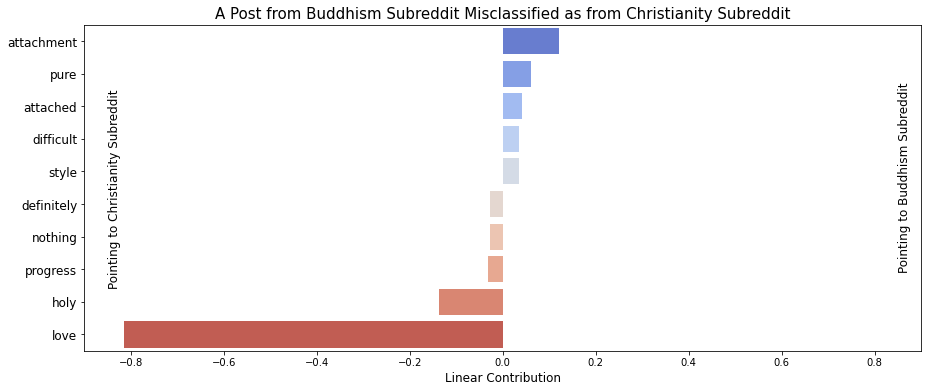

In [70]:
# Extract the tokens with highest contribution to the linear regression equation
top_tokens = pd.concat([post_df.head(5), post_df.tail(5)])

# Plot the token contribution as a horizontal barchart
fig, ax = plt.subplots(figsize=(15,6))
sns.barplot(data=top_tokens, x='linear_contribution', y='token', palette='coolwarm', ax=ax)
ax.set_xlabel('Linear Contribution', fontsize=12)
ax.set_ylabel('')
ax.set_title("A Post from Buddhism Subreddit Misclassified as from Christianity Subreddit", fontsize=15)
ax.set(xlim=(-0.9, 0.9))
ax.set_yticklabels(labels=top_tokens['token'], fontsize=12)
ax.text(-0.85, 7.5, 'Pointing to Christianity Subreddit', rotation=90, fontsize=12)
ax.text(0.85, 7, 'Pointing to Buddhism Subreddit', rotation=90, fontsize=12);

**Observation:**
- This particular post has a high count of word 'love' which is relatively strongly associated to posts from Christianity subreddits. 
- Although Buddhism related words are also mentioned in the post, i.e. 'attachment', 'pure' but it is not mention as often and those words are not as strongly correlated to Buddhism subreddit than the word 'love' is to Christianity subreddit. 

### Christianity Subreddit Post Misclassified as from Buddhism Subreddit

Similarly, a review on misclassified post originally belongs to Christianity subreddit is conducted in a similar fashion.

In [71]:
# Select one post from Buddhism subreddit wrongly classified as Christianity subreddit
post = all_posts.iloc[371,:]['all_text']

# Obtain tfidf score of the post
tfidf = best_models['Logistic Regression'].best_estimator_.steps[0][1].transform([post])

# Obtain the token name for each column 
tokens = best_models['Logistic Regression'].best_estimator_.steps[0][1].get_feature_names()

# Print the post
print(post)

I’d like to get some of you guy’s thoughts on the book of Enoch. I believe it was discovered around the 1700s then again when the Dead Sea scrolls were found. How should this book be viewed? Is it false teaching? What value does this book bring? Thoughts on the book of Enoch. [https://www.youtube.com/watch?v=440hI9lnAlc](https://www.youtube.com/watch?v=440hI9lnAlc) I think we should stick to scripture. Enoch, and books of apocrypha are not in it .. 


In [72]:
# Create a dataframe consisting token and their linear contribution on log

# Convert tfidf score into dataframe
post_df = pd.DataFrame(tfidf.todense(), columns=tokens).T
post_df.rename(columns={0: 'Tf-idf score'}, inplace=True)

# Remove tfidf score == 0 (non-existing token in the selected string)
post_df = post_df[post_df['Tf-idf score']!=0]
post_df.rename_axis('token', inplace=True)

# Include coefficient value for each tokens in the string
post_df = post_df.merge(coef, how='inner', left_on='token', right_on='token')

# Include coefficient value for each tokens in the string
post_df['linear_contribution'] = post_df['Tf-idf score']*post_df['coef']
post_df.sort_values(by='linear_contribution', ascending=False, inplace=True)
post_df

,token,Tf-idf score,coef,linear_contribution
2,book,0.706456,0.789590,0.557811
9,stick,0.230161,0.196970,0.045335
11,thought,0.239530,0.188537,0.045160
5,found,0.151946,-0.015234,-0.002315
7,like,0.080475,-0.039617,-0.003188
10,think,0.094751,-0.093059,-0.008817
6,get,0.103840,-0.191472,-0.019882
0,around,0.143610,-0.194355,-0.027911
1,believe,0.126733,-0.362248,-0.045909
4,false,0.224126,-0.224640,-0.050348


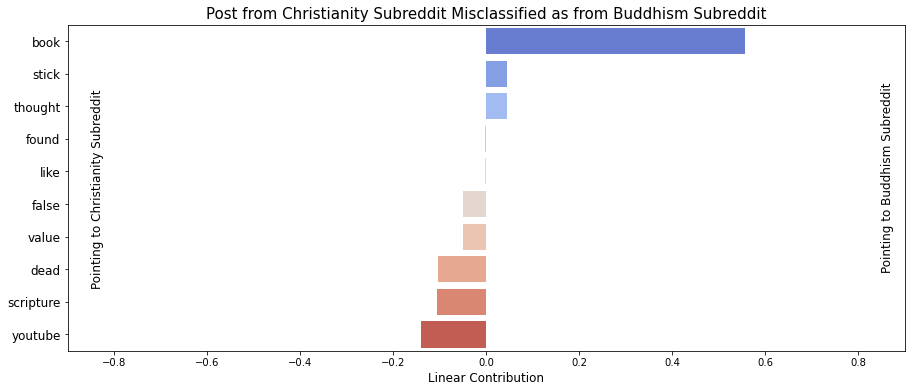

In [73]:
# Extract the tokens with highest contribution to the linear regression equation
top_tokens = pd.concat([post_df.head(5), post_df.tail(5)])

# Plot the token contribution as a horizontal barchart
fig, ax = plt.subplots(figsize=(15,6))
sns.barplot(data=top_tokens, x='linear_contribution', y='token', palette='coolwarm', ax=ax)
ax.set_xlabel('Linear Contribution', fontsize=12)
ax.set_ylabel('')
ax.set_title("Post from Christianity Subreddit Misclassified as from Buddhism Subreddit", fontsize=15)
ax.set(xlim=(-0.9, 0.9))
ax.set_yticklabels(labels=top_tokens['token'], fontsize=12)
ax.text(-0.85, 7.5, 'Pointing to Christianity Subreddit', rotation=90, fontsize=12)
ax.text(0.85, 7, 'Pointing to Buddhism Subreddit', rotation=90, fontsize=12);

**Observation:**
- Interesting to observe that this particular post seems to contain mostly neutral words such as 'book' and 'stick'. Also, there is no mention of strong Buddhism related word that may confuse the model in classifying the data otherwise.
- So the primary reason of this misclassification is due to the lack of strongly correlated Christianity features such as 'Jesus', 'God' or 'Bible'.

I performed a few more analysis on some other misclassified posts and find a general trend that misclassified posts lack the presence of token which is strongly correlated to the correct subreddit (jargon).

###  Length of Post

I was then curious if the lack of jargon is due to the post being too short and may focused on talking about certain specific topic, therefore, increases the chance of not mentioning those jargons. Therefore, I take the average word counts for the misclassified posts and compare it to the rest of the dataset.

In [74]:
# Average length of misclassified posts
misc_len = round(all_posts.iloc[misc_posts.index, :]['all_text'].str.len().mean())

# Average length of correctly classified posts
avg_len = round(all_posts['all_text'].str.len().mean())

print("Average length of posts in the dataset: {} words".format(avg_len))
print("Average length of the misclassified posts: {} words".format(misc_len))

Average length of posts in the dataset: 1637 words
Average length of the misclassified posts: 680 words


**Observation:**
- The misclassified posts were indeed shorter in word counts compared to the dataset in general as it does not contain the jargon. 

# Summary

## Conclusion

To recap, the objective of the project is to understand linguistic pattern and cultural difference in Chritianity and Buddhism subreddits. We split the task two-folds into:
1. Data gathering and selection process
2. Analysis of linguistic pattern based on EDA and NLP

### Data Gathering and Selection

Dataset is obtained by web-scraping both subreddits using *requests* library. This way we are able to extract title, post text (selftext) and first few (earliest) comments on the subreddits. Subsequently, a function is created to automate the scrapping process to collect sufficient posts for our analysis. 

After a few iteration, it was found that the best set of data to train the model is to include title, selftext and three of the first comment on the posts. This results in a higher accuracy classification model which means that the data contains sufficient linguistic pattern to differentiate the subreddits.

### Linguistic Pattern Analysis through EDA and NLP

EDA steps on both subreddits uncovers a few observations:
- People on Buddhism subreddit are more likely to post empty selftext compared to in Christianity subreddit. 
    - Most of these empty posts are posts with pictures or videos.
- On average people on Christian subreddit share a slightly longer post than people on Buddhism subreddit. 
    - Meanwhile, peole tends to share a longer response comments on the post in Buddhism subreddit
- Buddhism subreddit is three times more likely to contain links to external resources, especially on the comment section compared to Christianity subreddit.

There are also some linguistic pattern observed on both subreddits after performing analysis wit the help of NLP:
- People on Buddhism subreddit frequently uses the word 'one' to refer to the meaning of 'an individual' in the context of providing people some advice. This is unseen in Christianity subreddit.
- Both subreddits spread positive sentiments especially on the comments section. 
    - There are also some depressing posts on both subreddits, i.e. relating to suicide, bad luck or misfortune. However, the communities on both subreddits have the tendency to provide consolation from the perspective of each religion.
- There are words that are frequently used more in one subreddit compared to the counterpart:

| Topic                                     | Token Primarily used in <br>Christian Subreddit | Token Primarily used in <br>Buddhism Subreddit              |
|:-------------------------------------------|:---------------------:|:---------------------------------:|
| Teacher/ Supreme figure                        | Lord, God | Buddha                          |
| Knowledge Transmission <br>and Repository | Bible               | Teaching, Dharma                |
| Object/ Place                                  | Church, Verse           | Statue, Tibetan       |
| Doctrine                                  | Faith, Sin, Love          | Karma, Mind                     |
| Activity                                  | Pray, Church        | Practice, Meditation |

The observation above are obtained using an NLP model built upon Tf-idf vectorizer and Logistic Regression classifier. The choice of the model is due to these reasons:
- Tf-idf vectorizer:
    - Provides weightage on the presence of each token relative of the frequency of the post and token resulting in a better model performance (lower bias and variance) on unseen data
- Logistic Regression classifier:
    - Provides a better model performance (lower bias and variance) on unseen data even on default hyperparameter values
    - Provides interpretability which can gives us an insight on which words are more closely related to each subreddit

## Model Limitation and Recommendation

Of course the model is not without limitation. Some posts that does not strictly talk about specific religion topics may be predicted wrongly. These posts are usually relating to life in general which may not contain any mention of a strong predictor words (jargons). It is more likely for a shorter post with little or no comments to be wrongly classified due to the lack of these jargons. 

However, some of these posts are relatively easily to be classified to the correct subreddit by human interpreter. If falsely classifying posts are not acceptable for some reasons, a few ways to improve the model are by:
- Let human interpreters to read through posts with similar prediction probability between both subreddits. However, for a bigger data, this may be too costly. 
- Build the model using Bidirectional Encoder Representation from Transformer (BERT) as it is a context-dependent model which performs the word embedding based on the neighboring words in which the word appear. This way, it will be able to capture the context of the discussion without being too reliant about a specific keywords.